In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [48]:
df = pd.read_csv("sim_data_full_v2.csv")

In [3]:
scenarios_to_plot = [1,4,7,10,13,16,19,22,30]

In [8]:
list(df.columns)

['archetype',
 'baseline_eir',
 'scenario_number',
 'iptsc_rdts_used',
 'iptsc_drugs_used',
 'cases_treated',
 'severe_cases_treated',
 'received_smc',
 'received_ivermectin',
 'received_primaquine',
 'pfpr0_5',
 'pfpr2_10',
 'pfpr6_15',
 'pfpr16_500',
 'pfpr_all',
 'clinical_incidence0_5',
 'clinical_incidence2_10',
 'clinical_incidence6_15',
 'clinical_incidence16_500',
 'clinical_incidence_all',
 'severe_incidence0_5',
 'severe_incidence2_10',
 'severe_incidence6_15',
 'severe_incidence16_500',
 'severe_incidence_all',
 'pop0_5',
 'pop2_10',
 'pop6_15',
 'pop16_500',
 'pop_all',
 'avg_age',
 'avg_age_clinical_cases',
 'avg_age_severe_cases',
 'Run_Number',
 'iptsc_rdts_used_STDEV',
 'iptsc_drugs_used_STDEV',
 'cases_treated_STDEV',
 'severe_cases_treated_STDEV',
 'received_smc_STDEV',
 'received_ivermectin_STDEV',
 'received_primaquine_STDEV',
 'pfpr0_5_STDEV',
 'pfpr2_10_STDEV',
 'pfpr6_15_STDEV',
 'pfpr16_500_STDEV',
 'pfpr_all_STDEV',
 'clinical_incidence0_5_STDEV',
 'clinical_in

In [14]:
df_scatterplot = df[np.in1d(df["scenario_number"], scenarios_to_plot)]

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


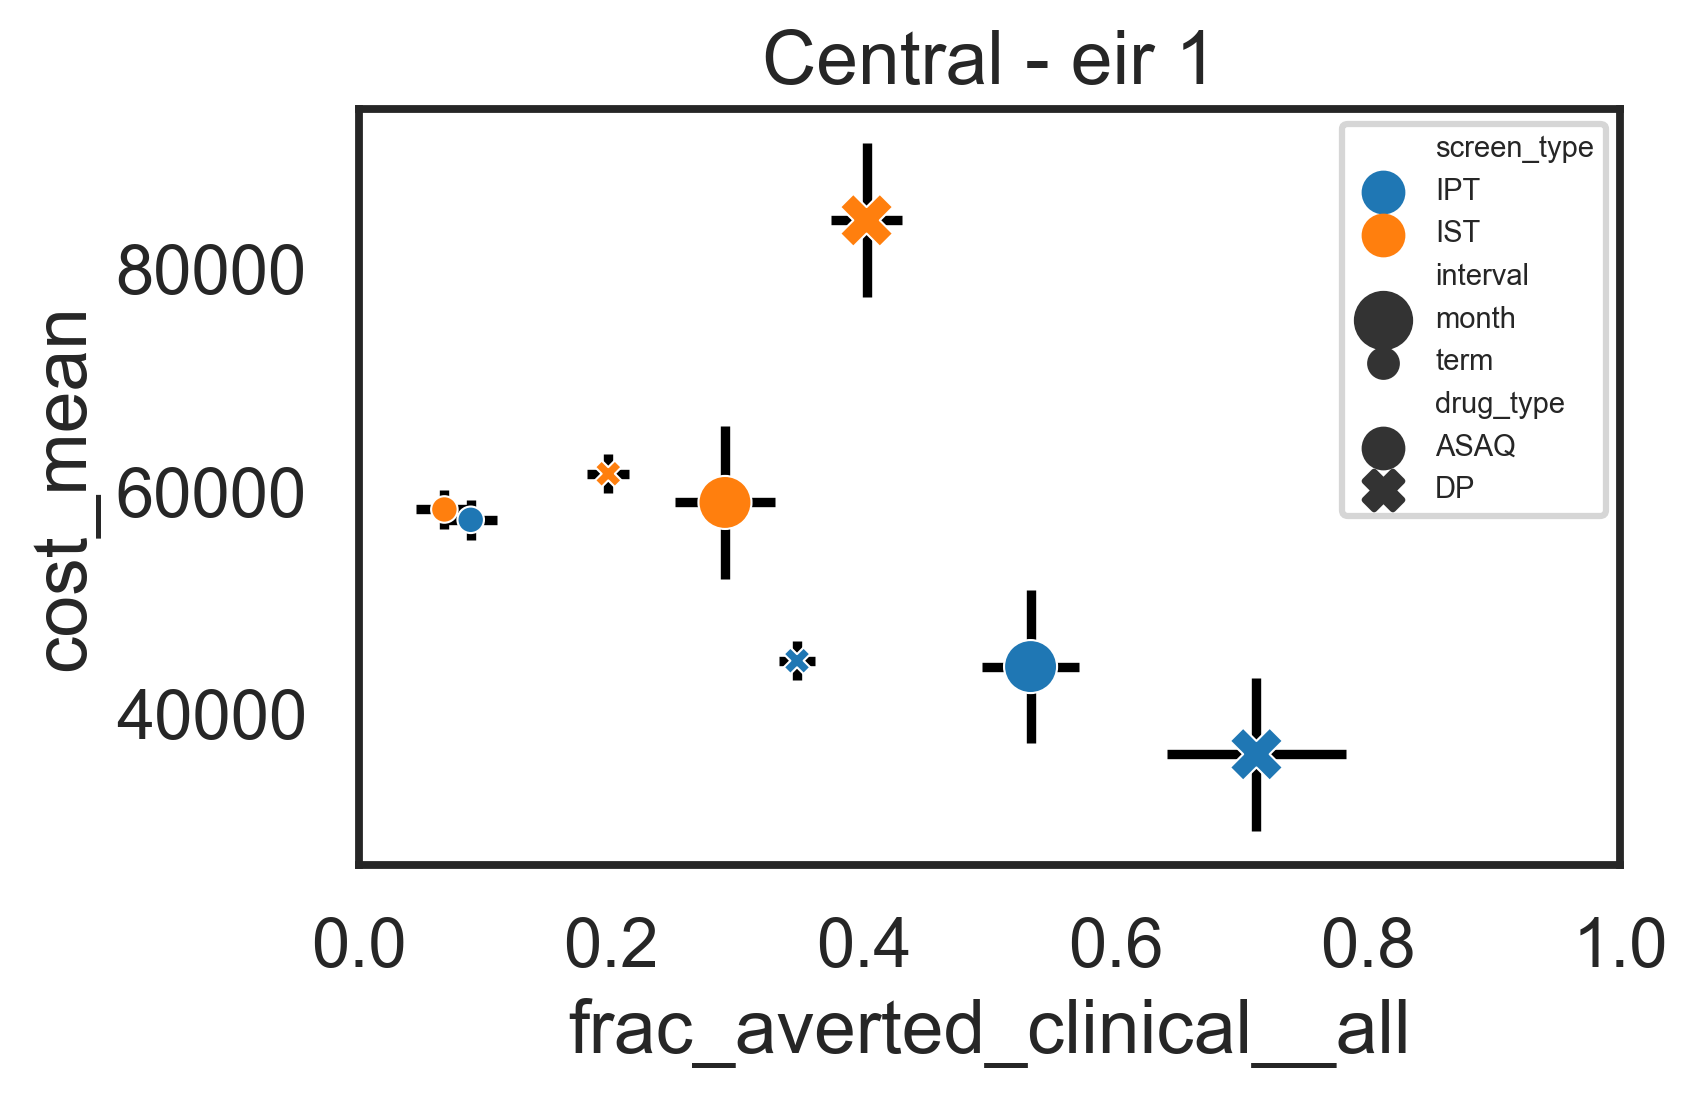

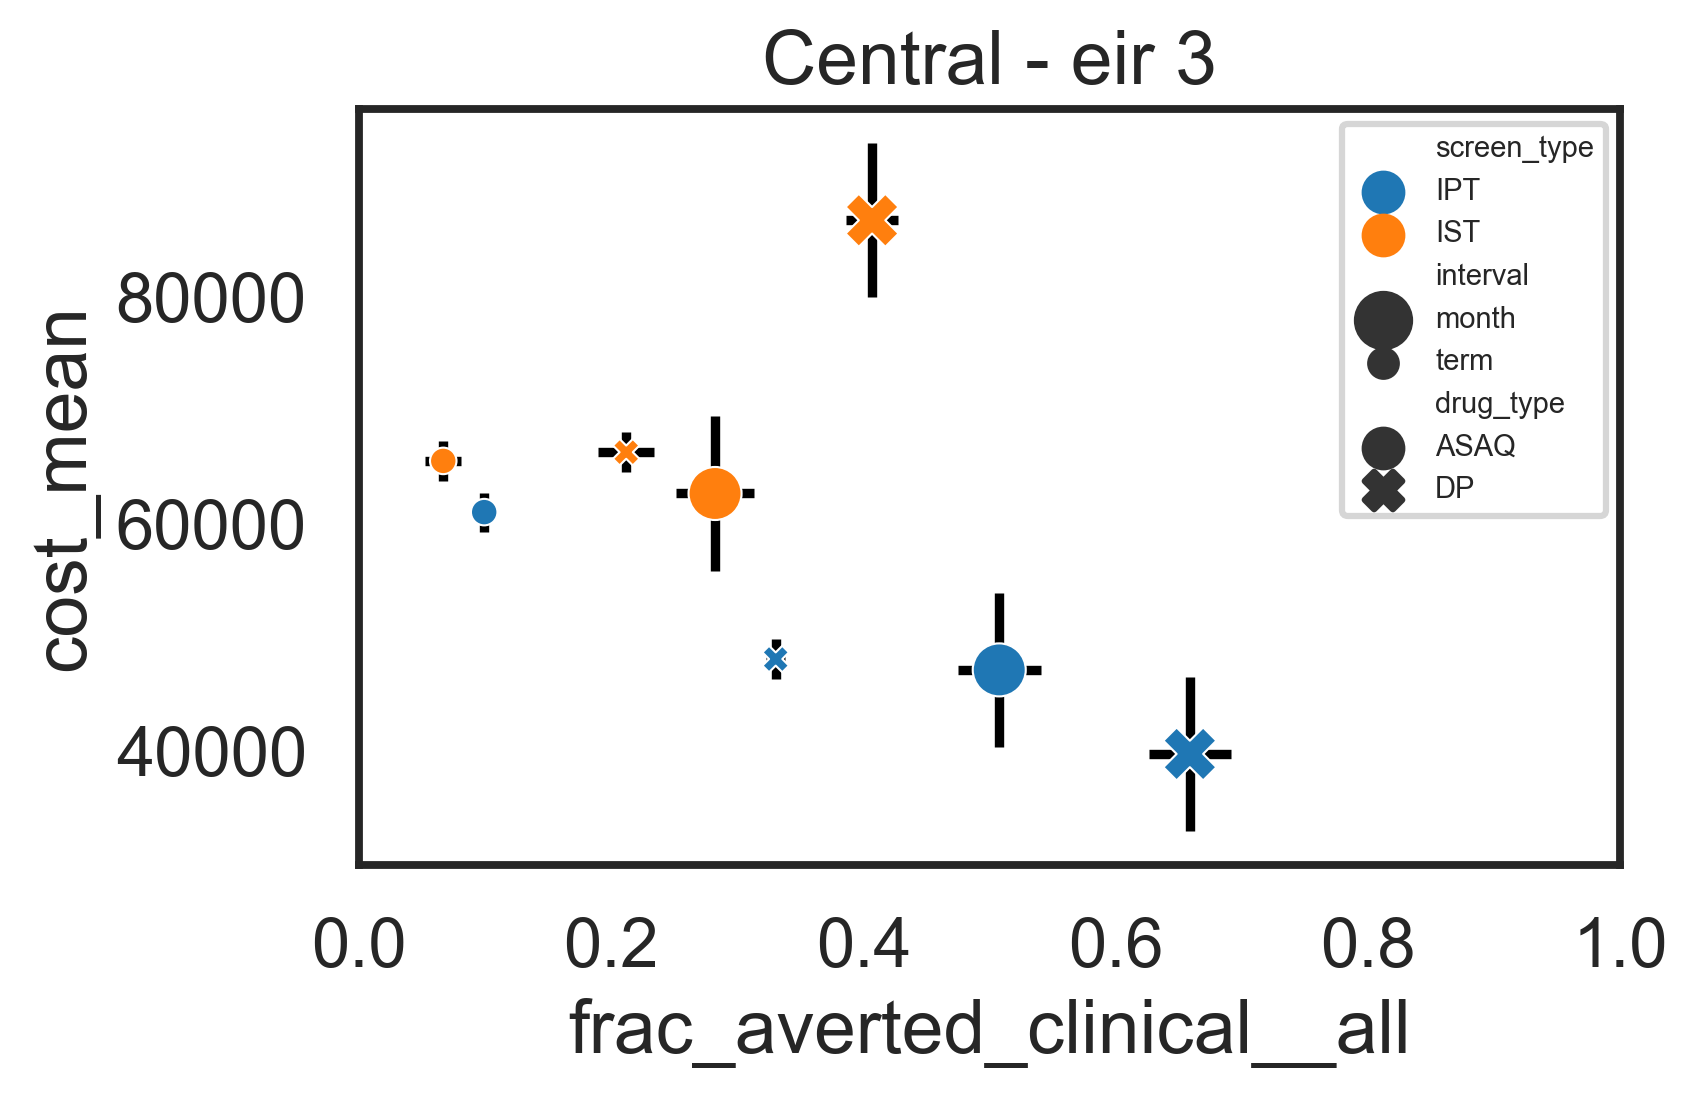

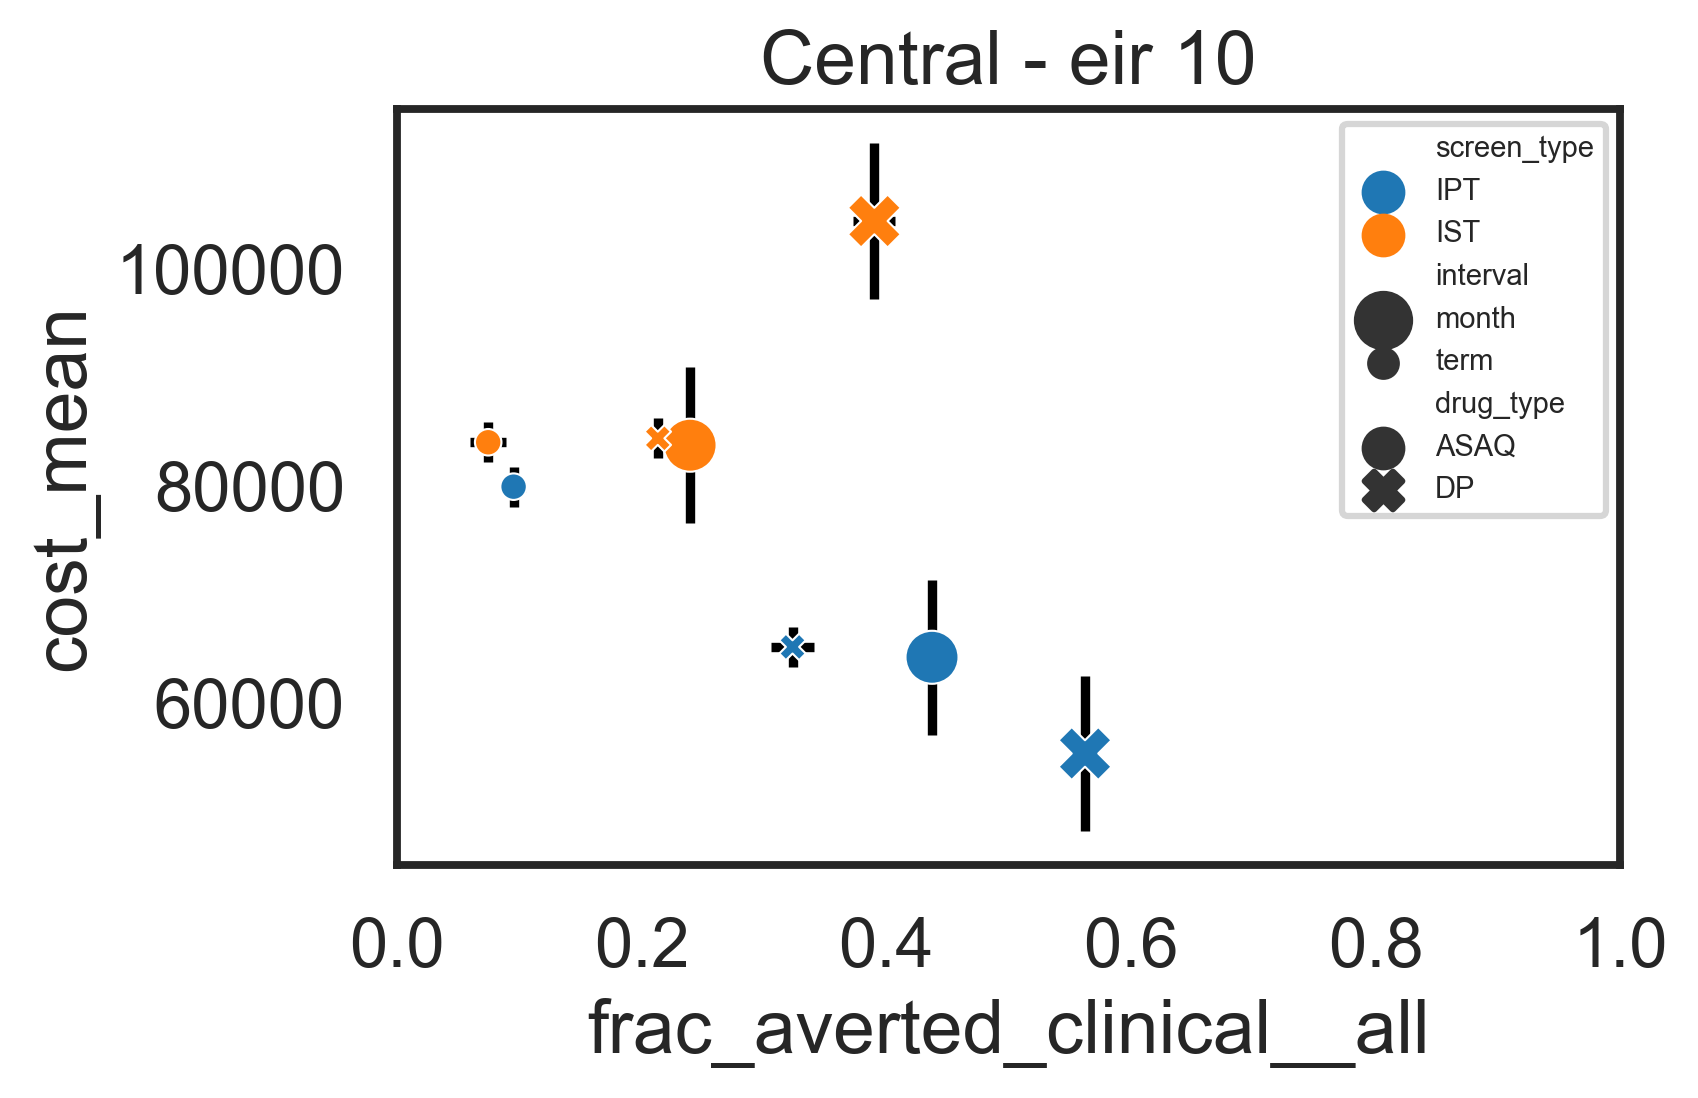

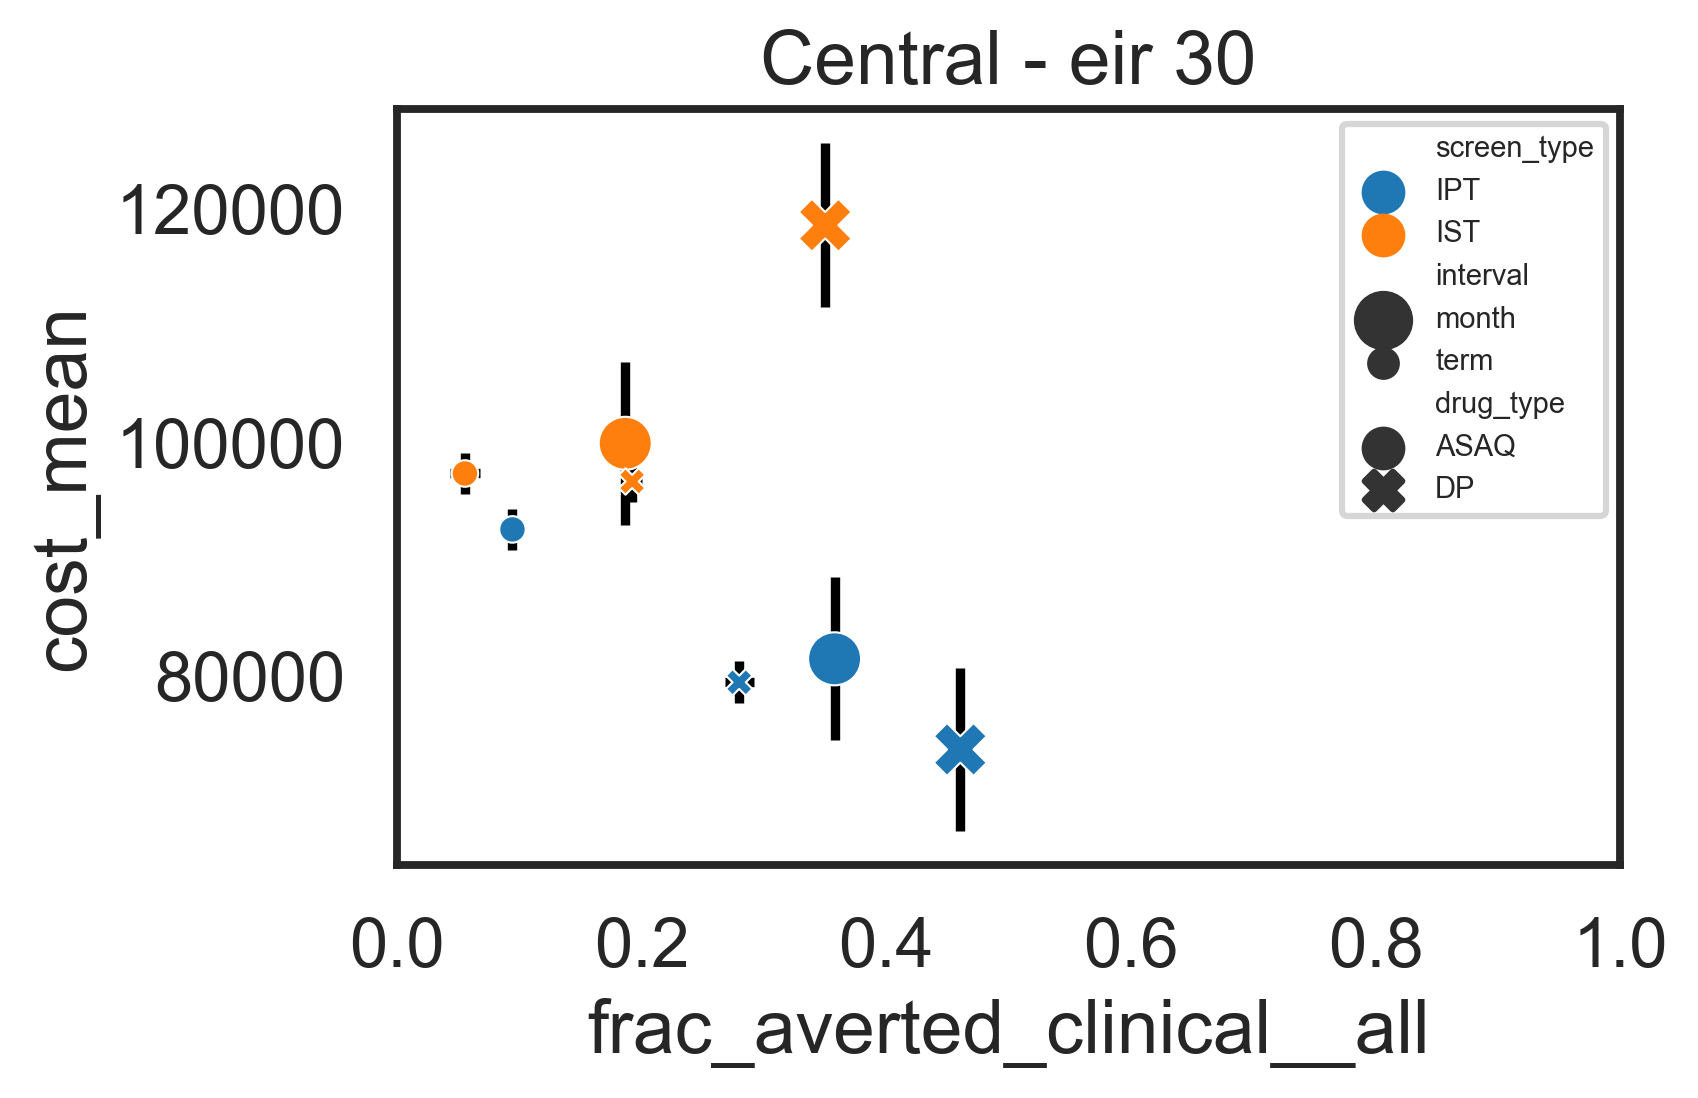

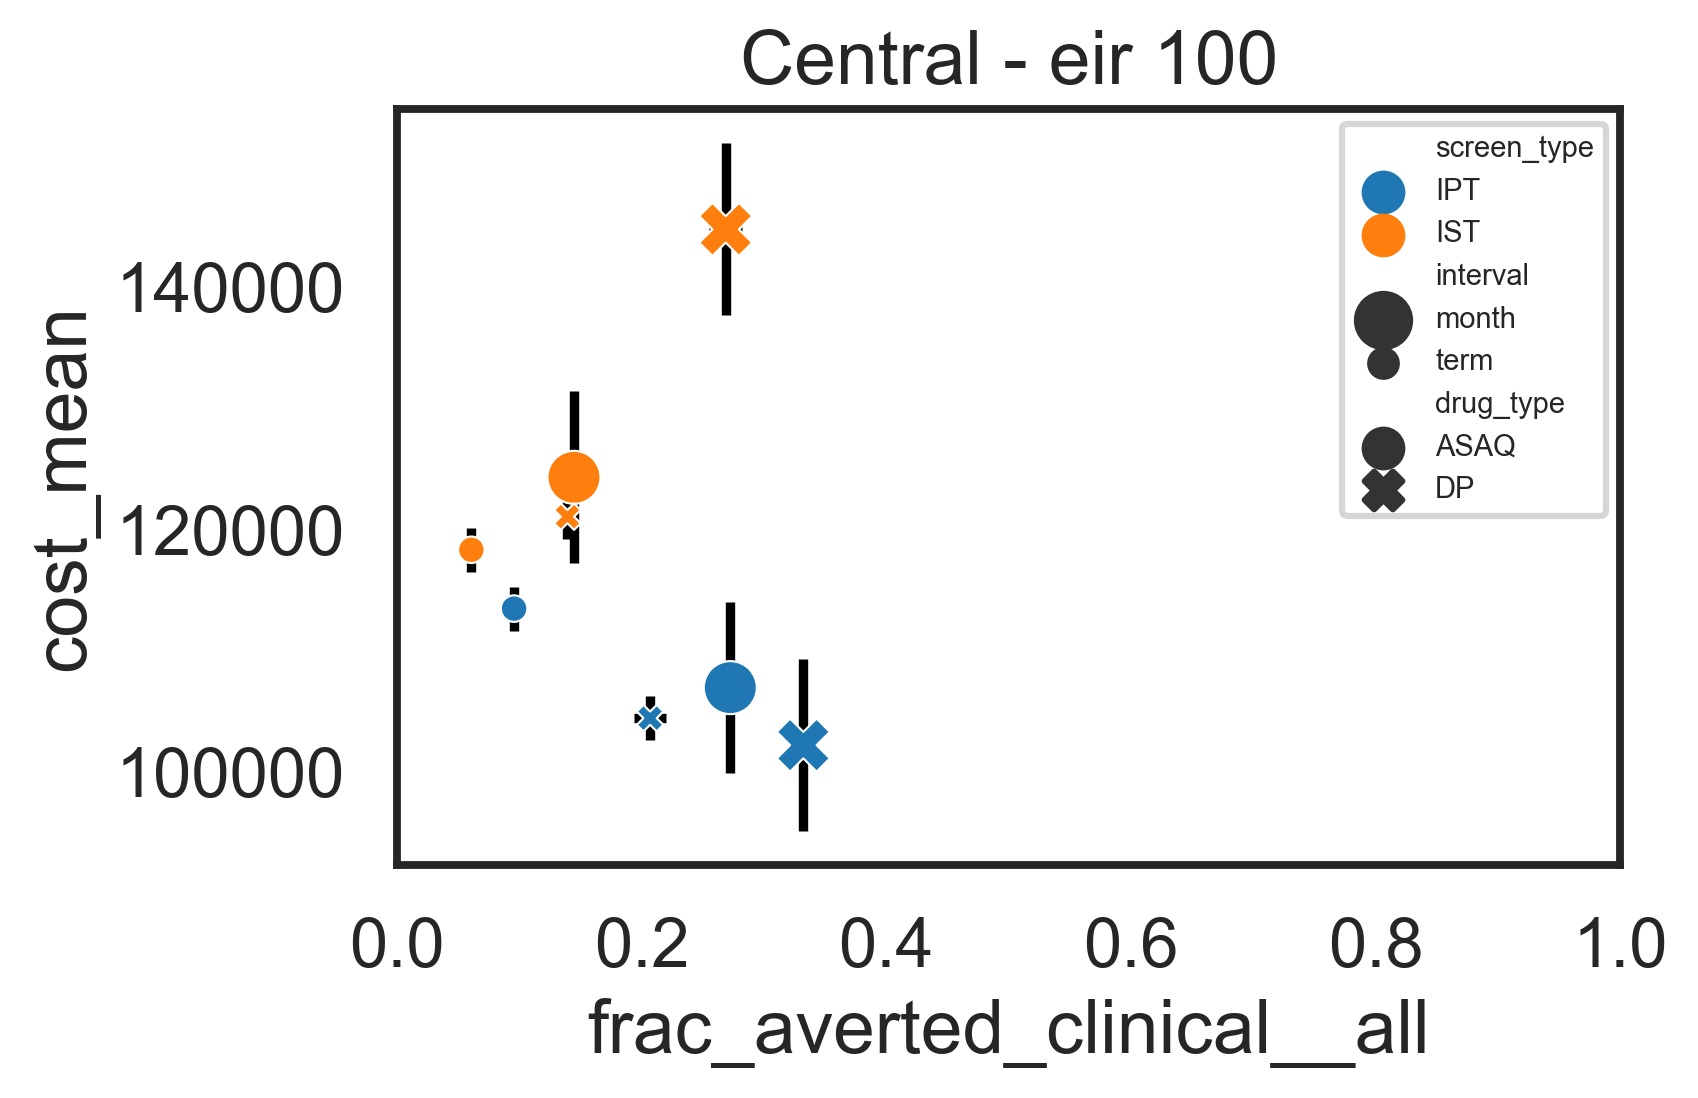

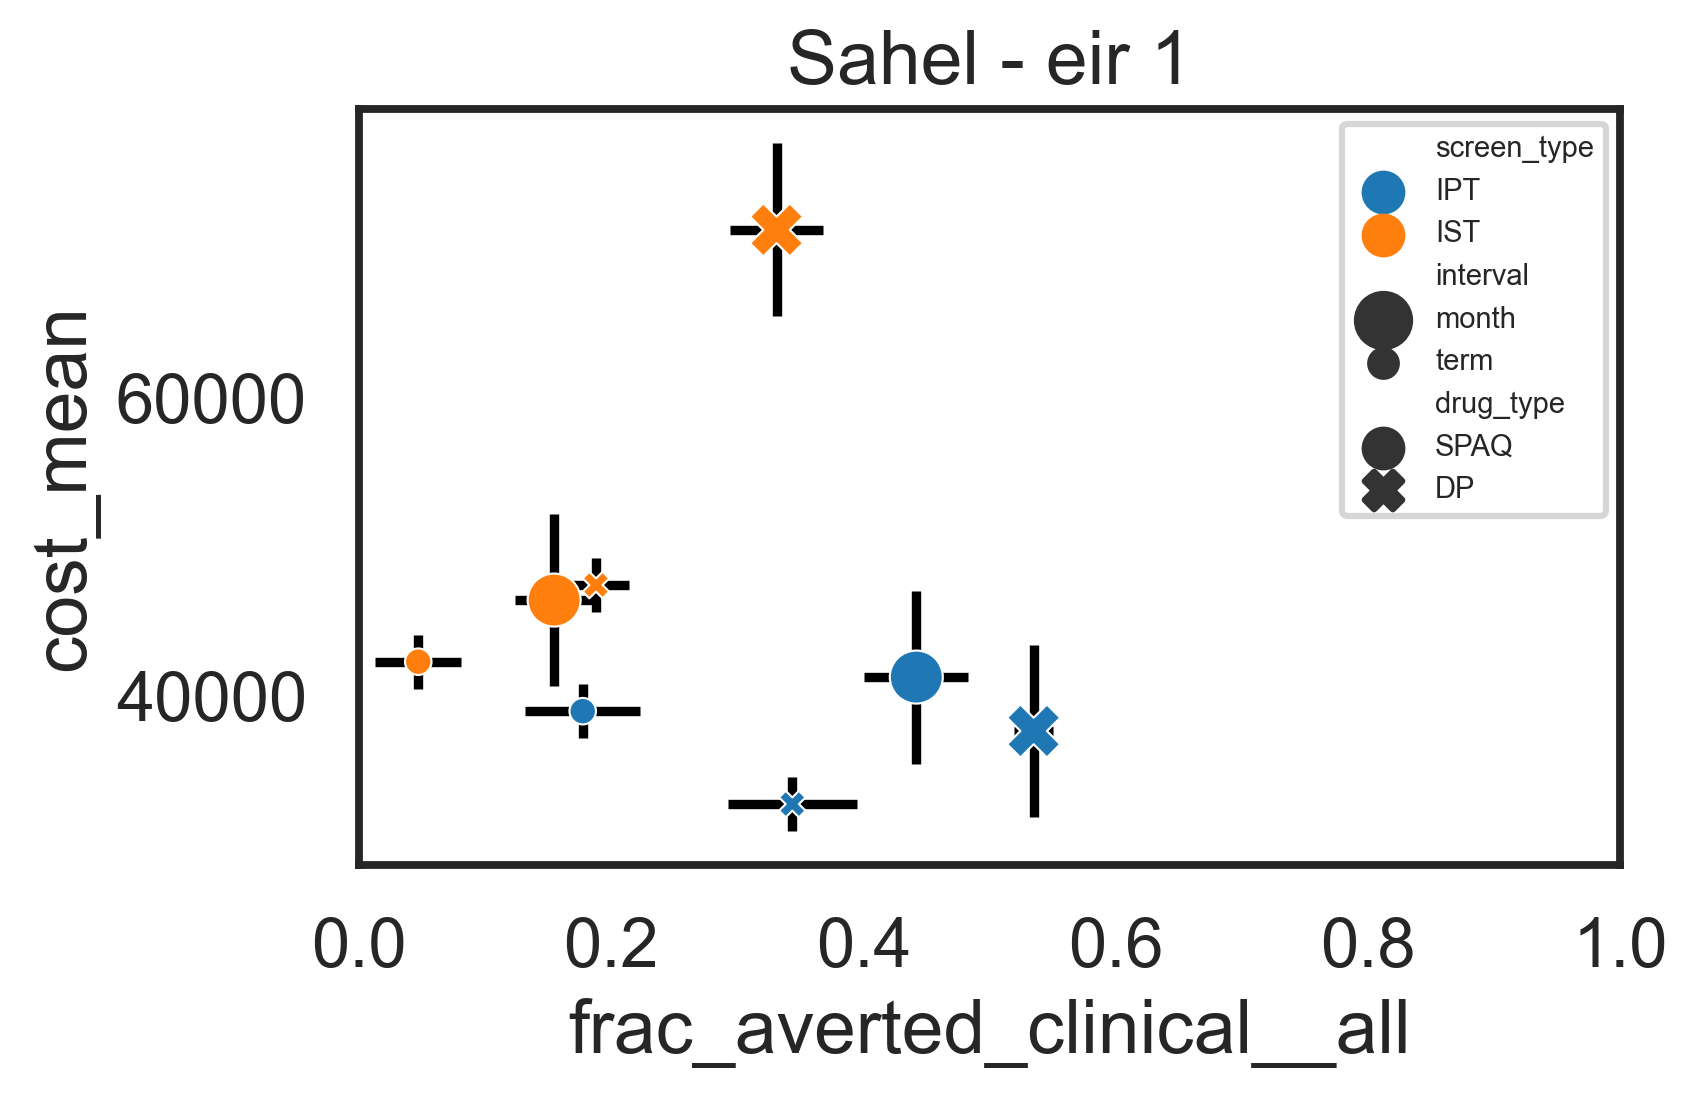

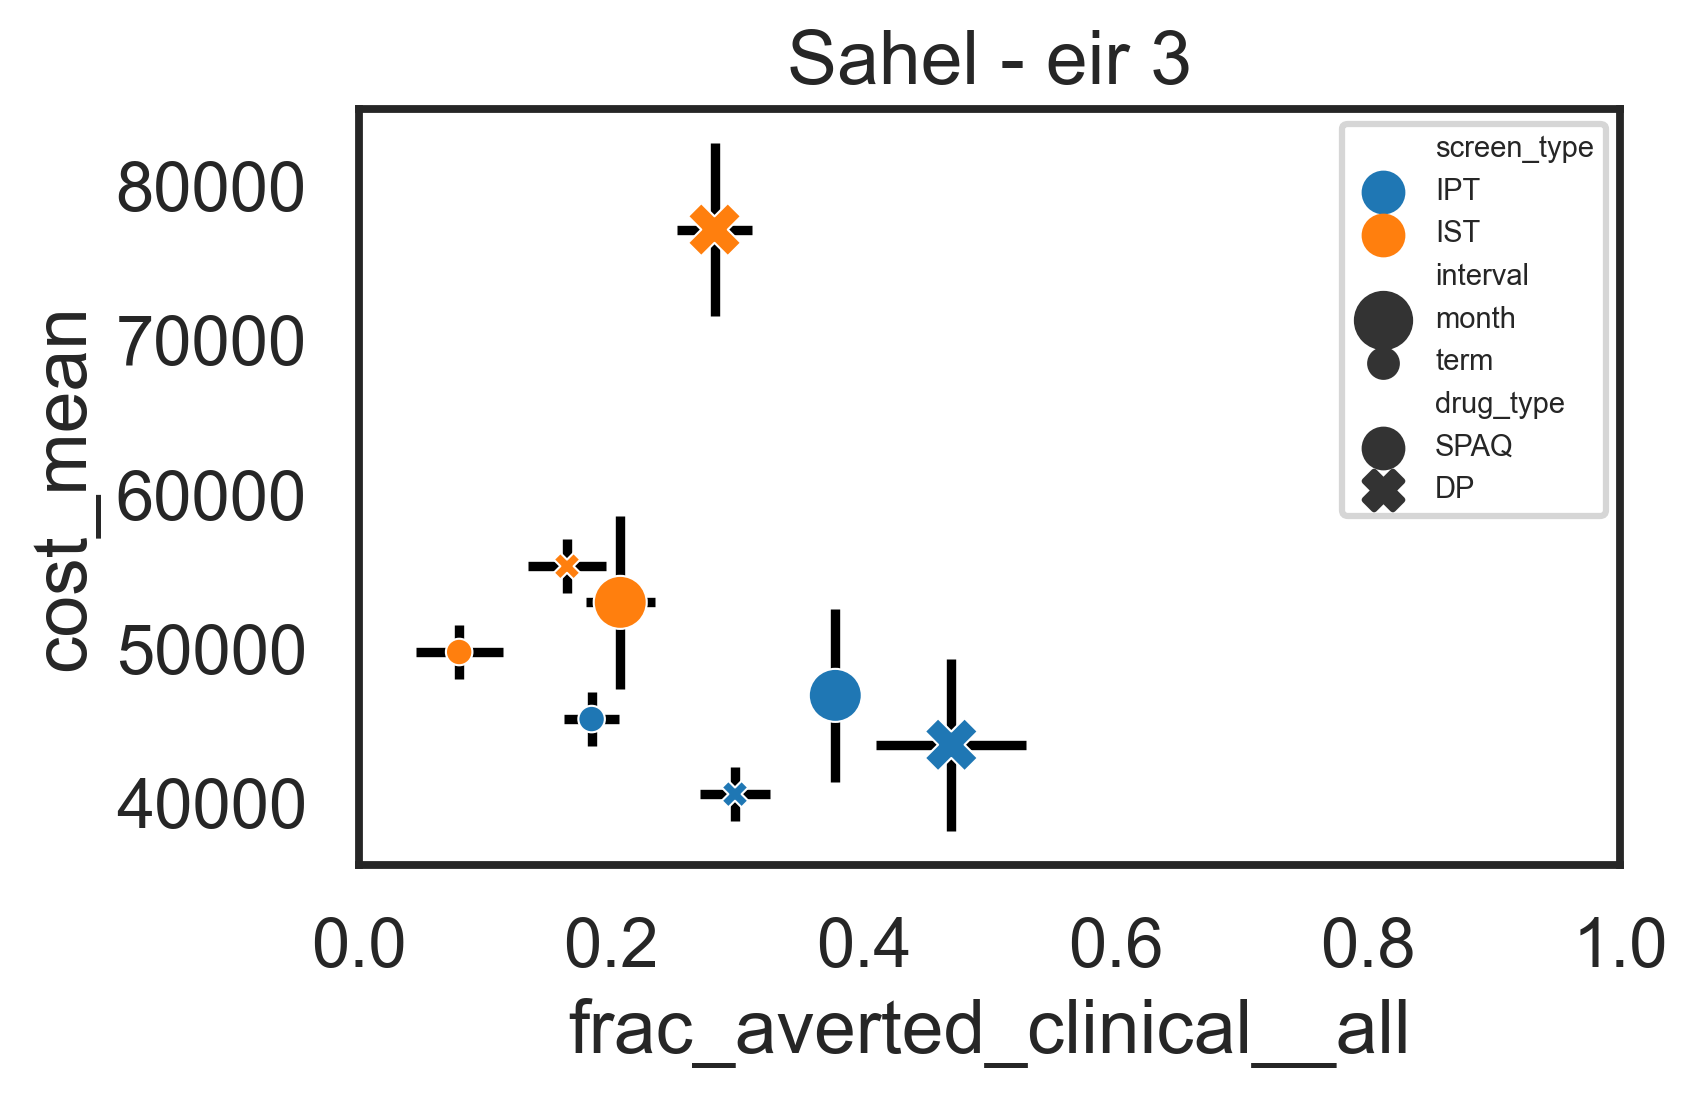

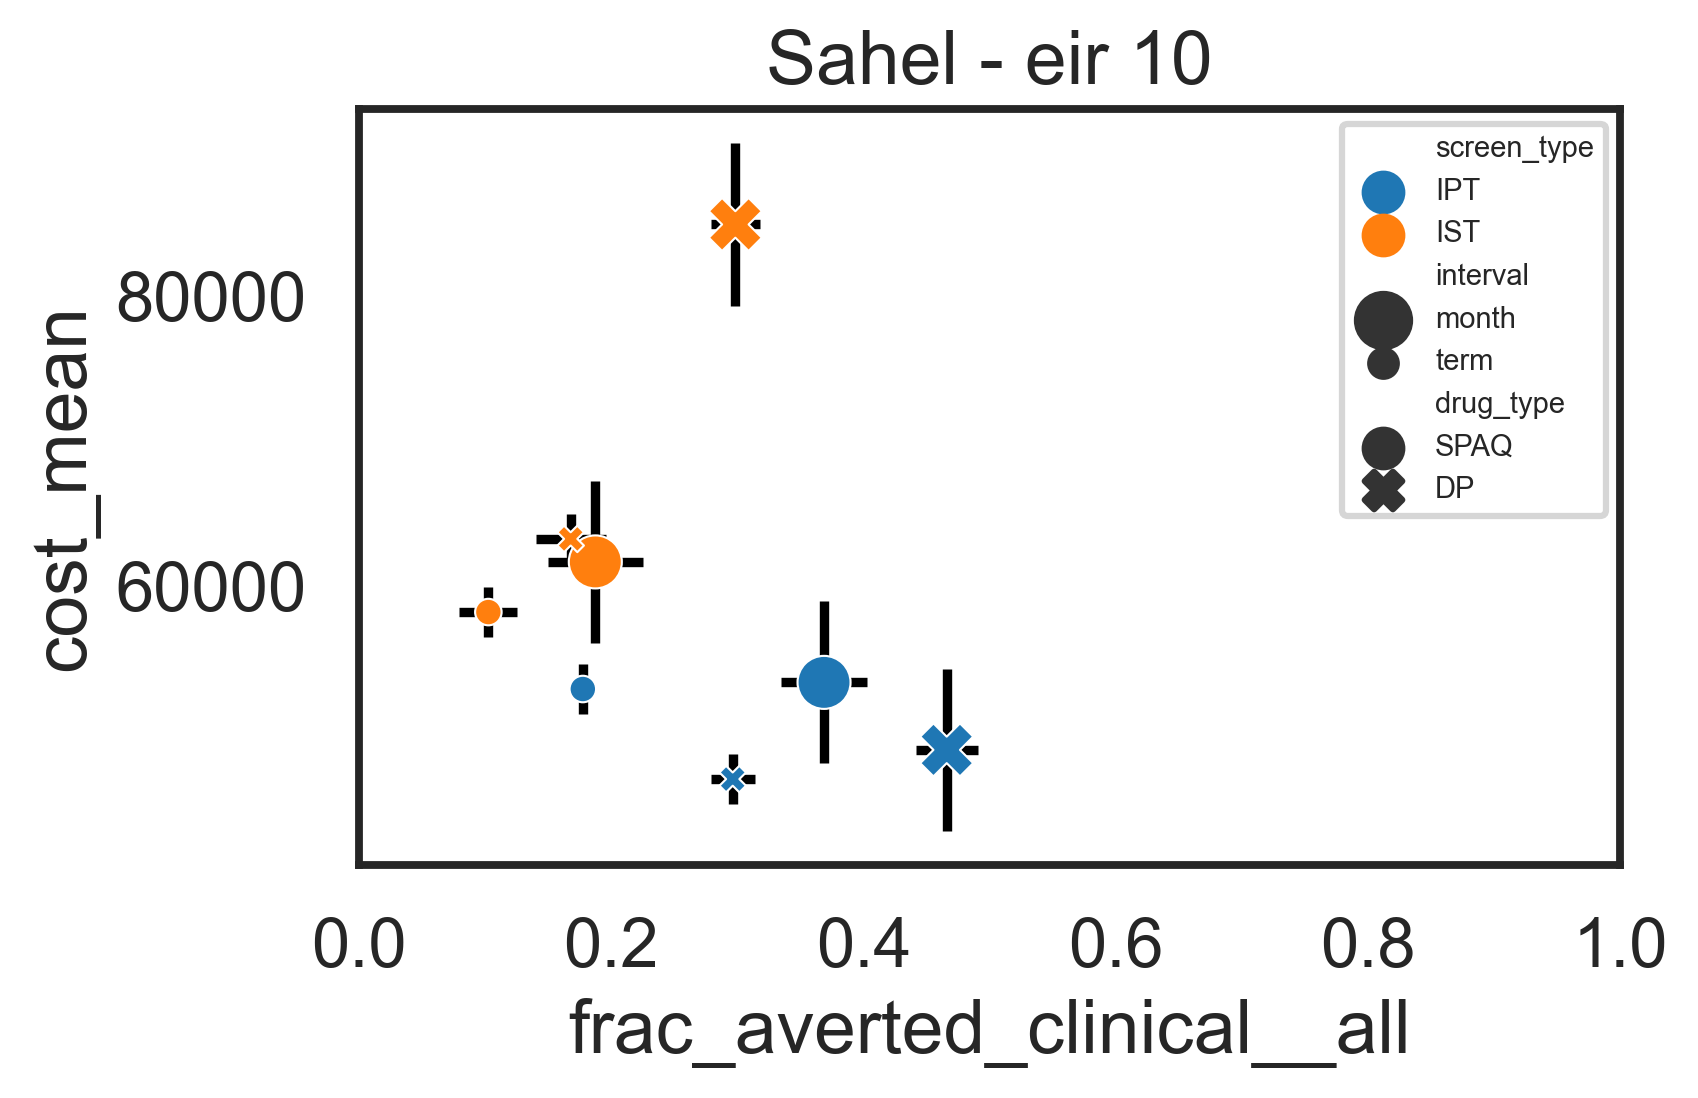

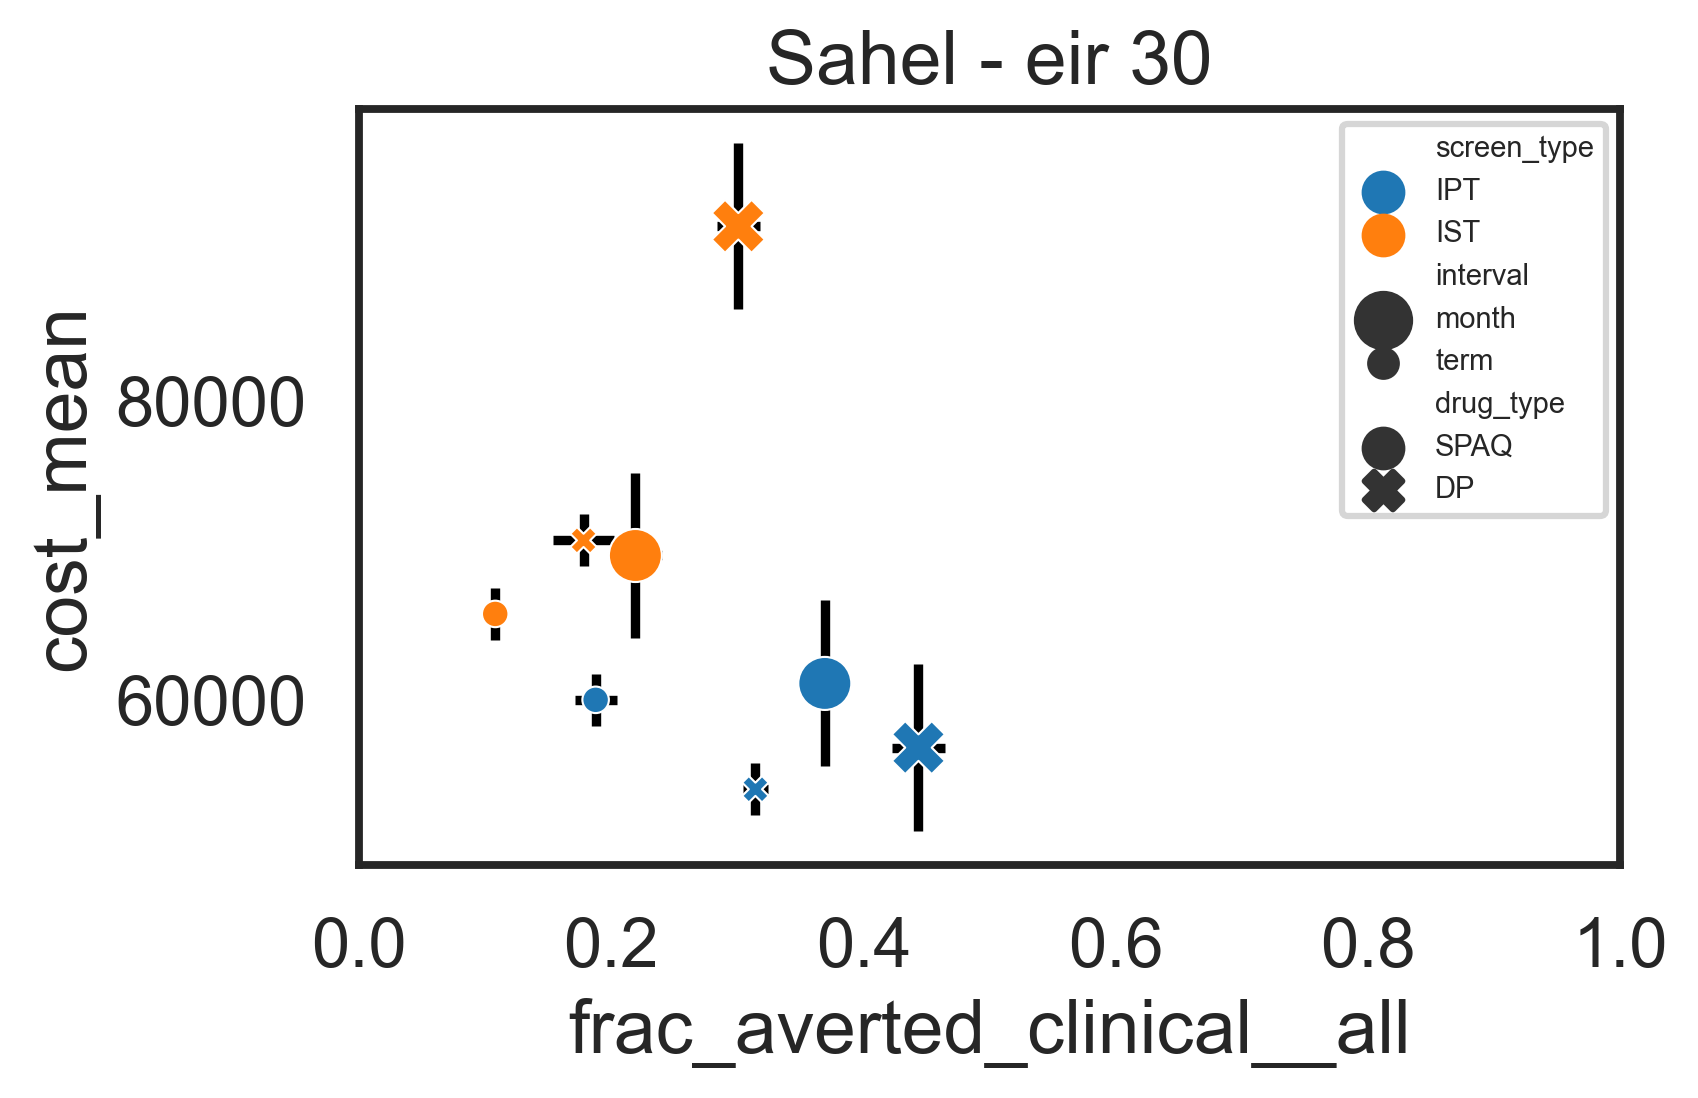

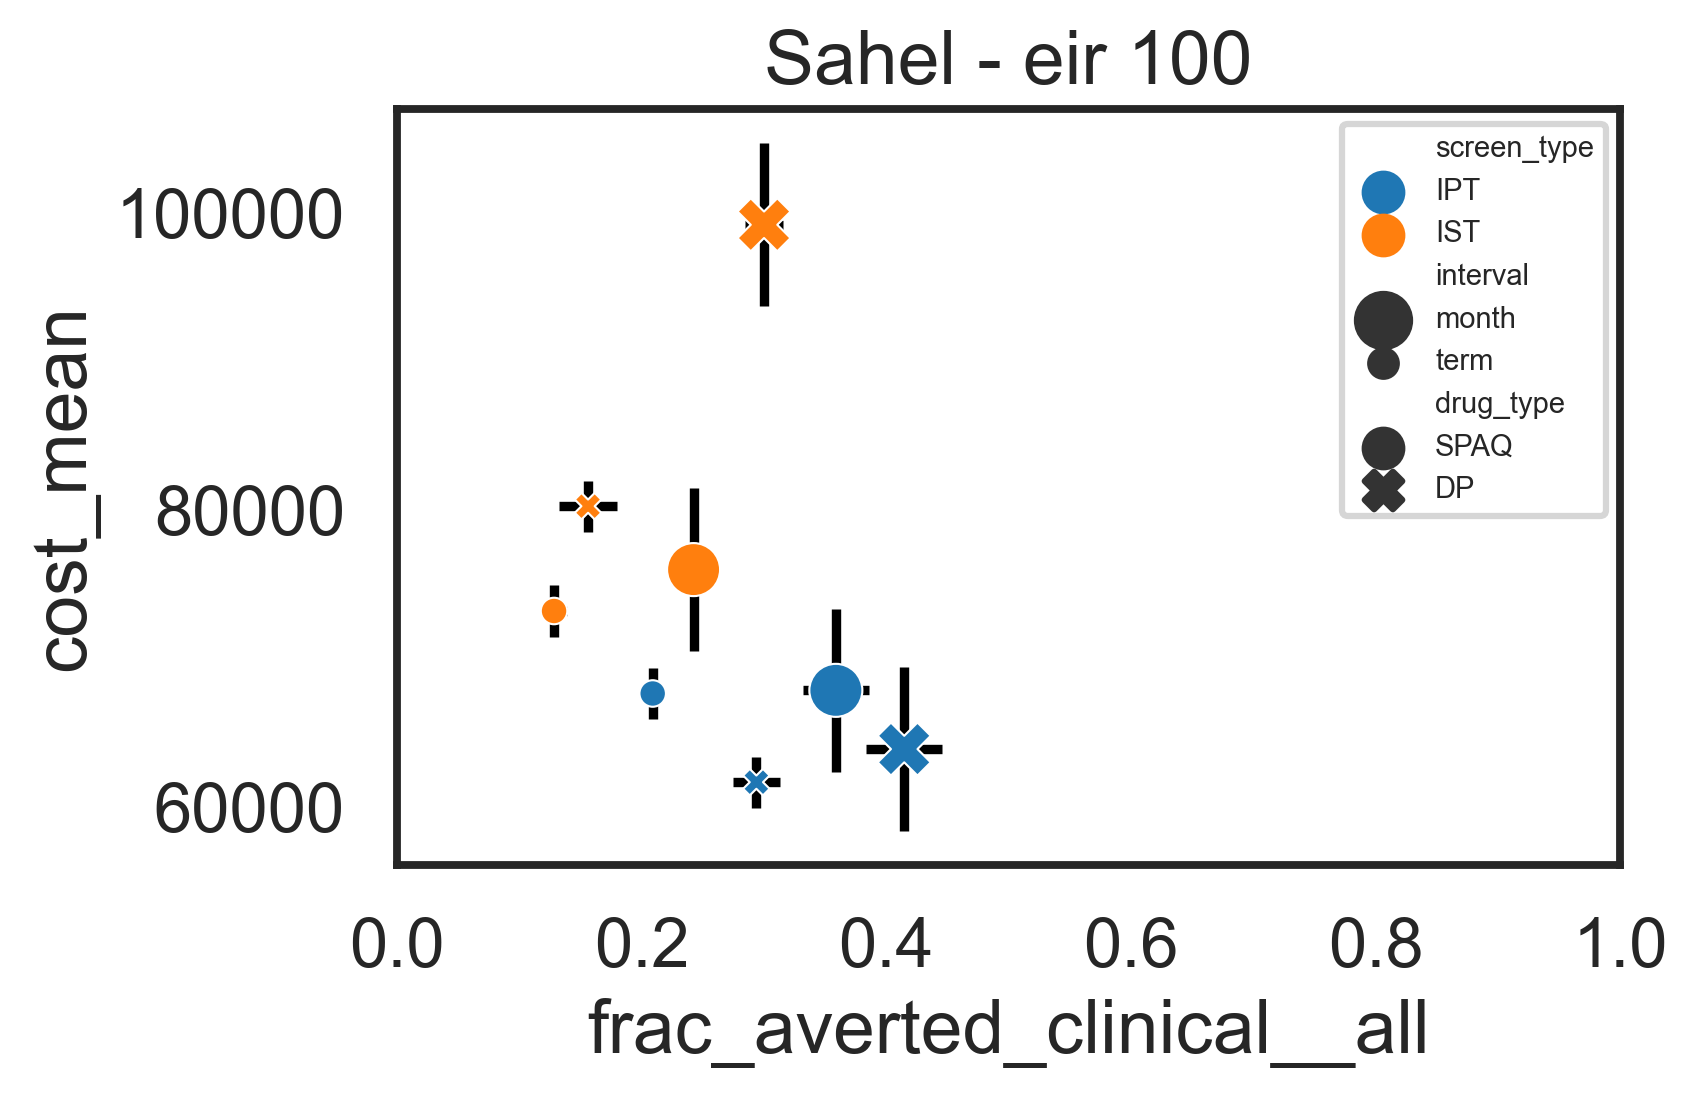

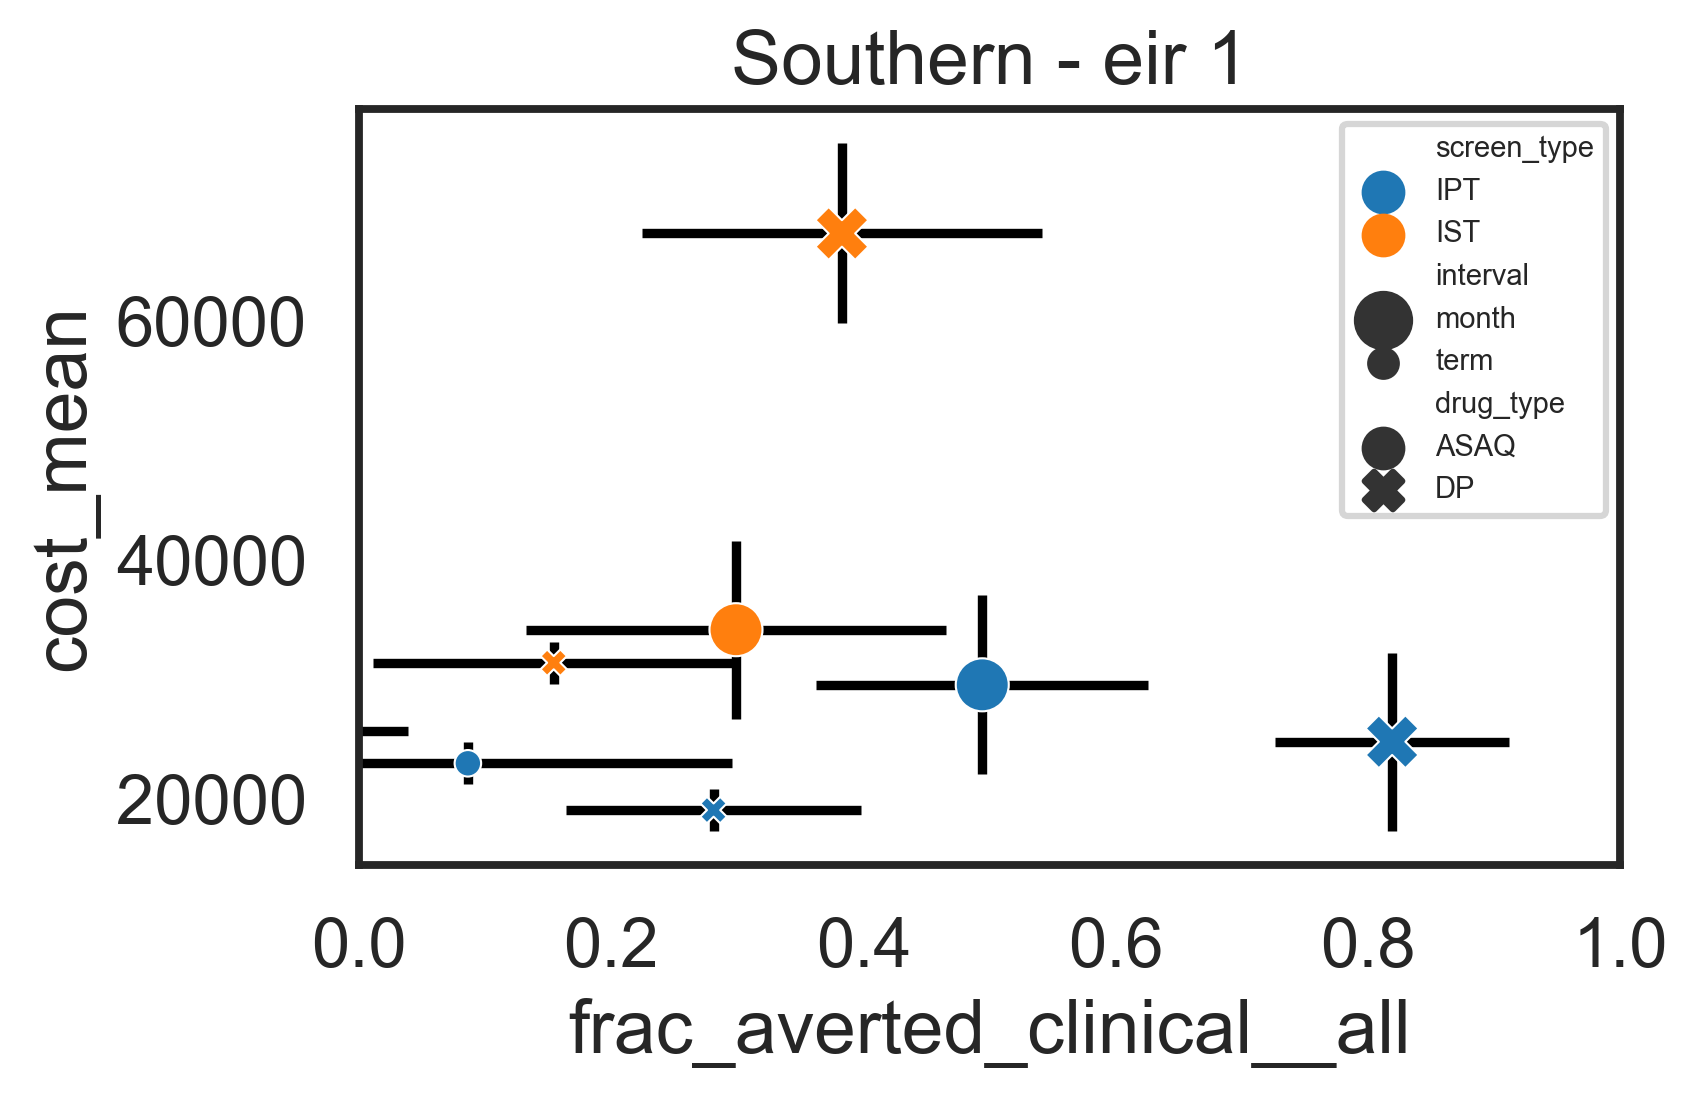

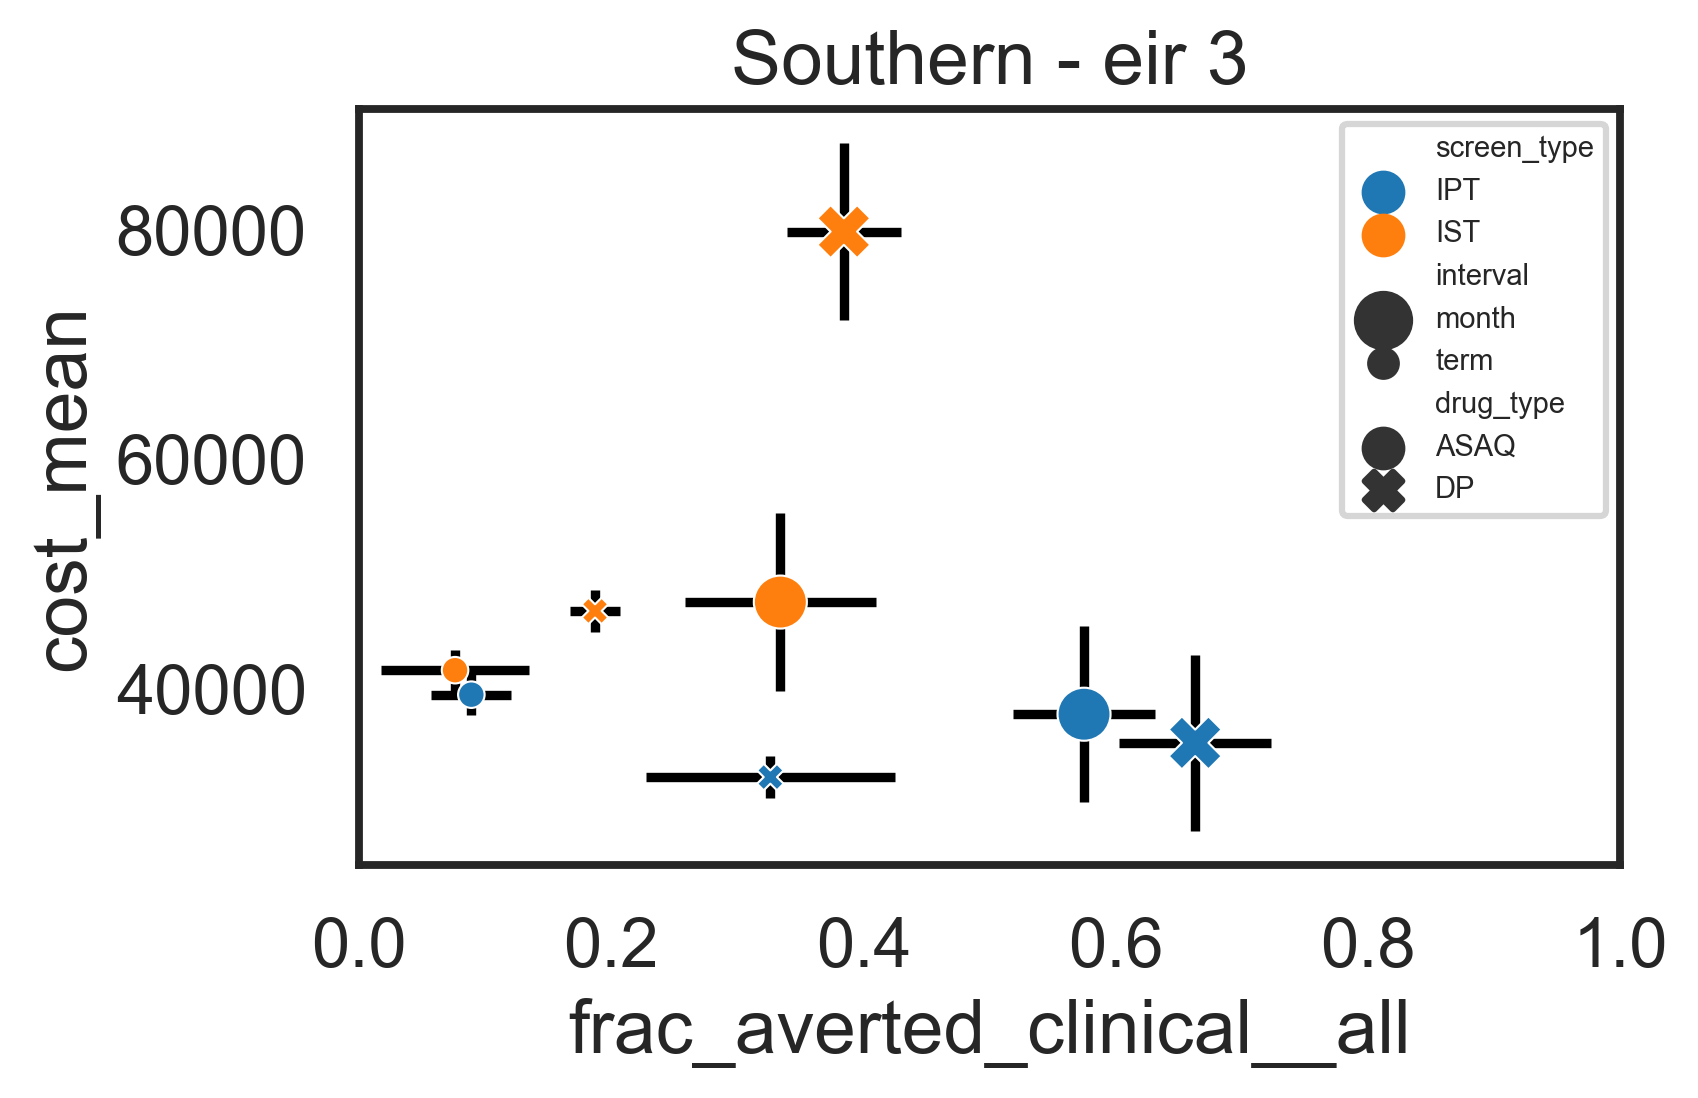

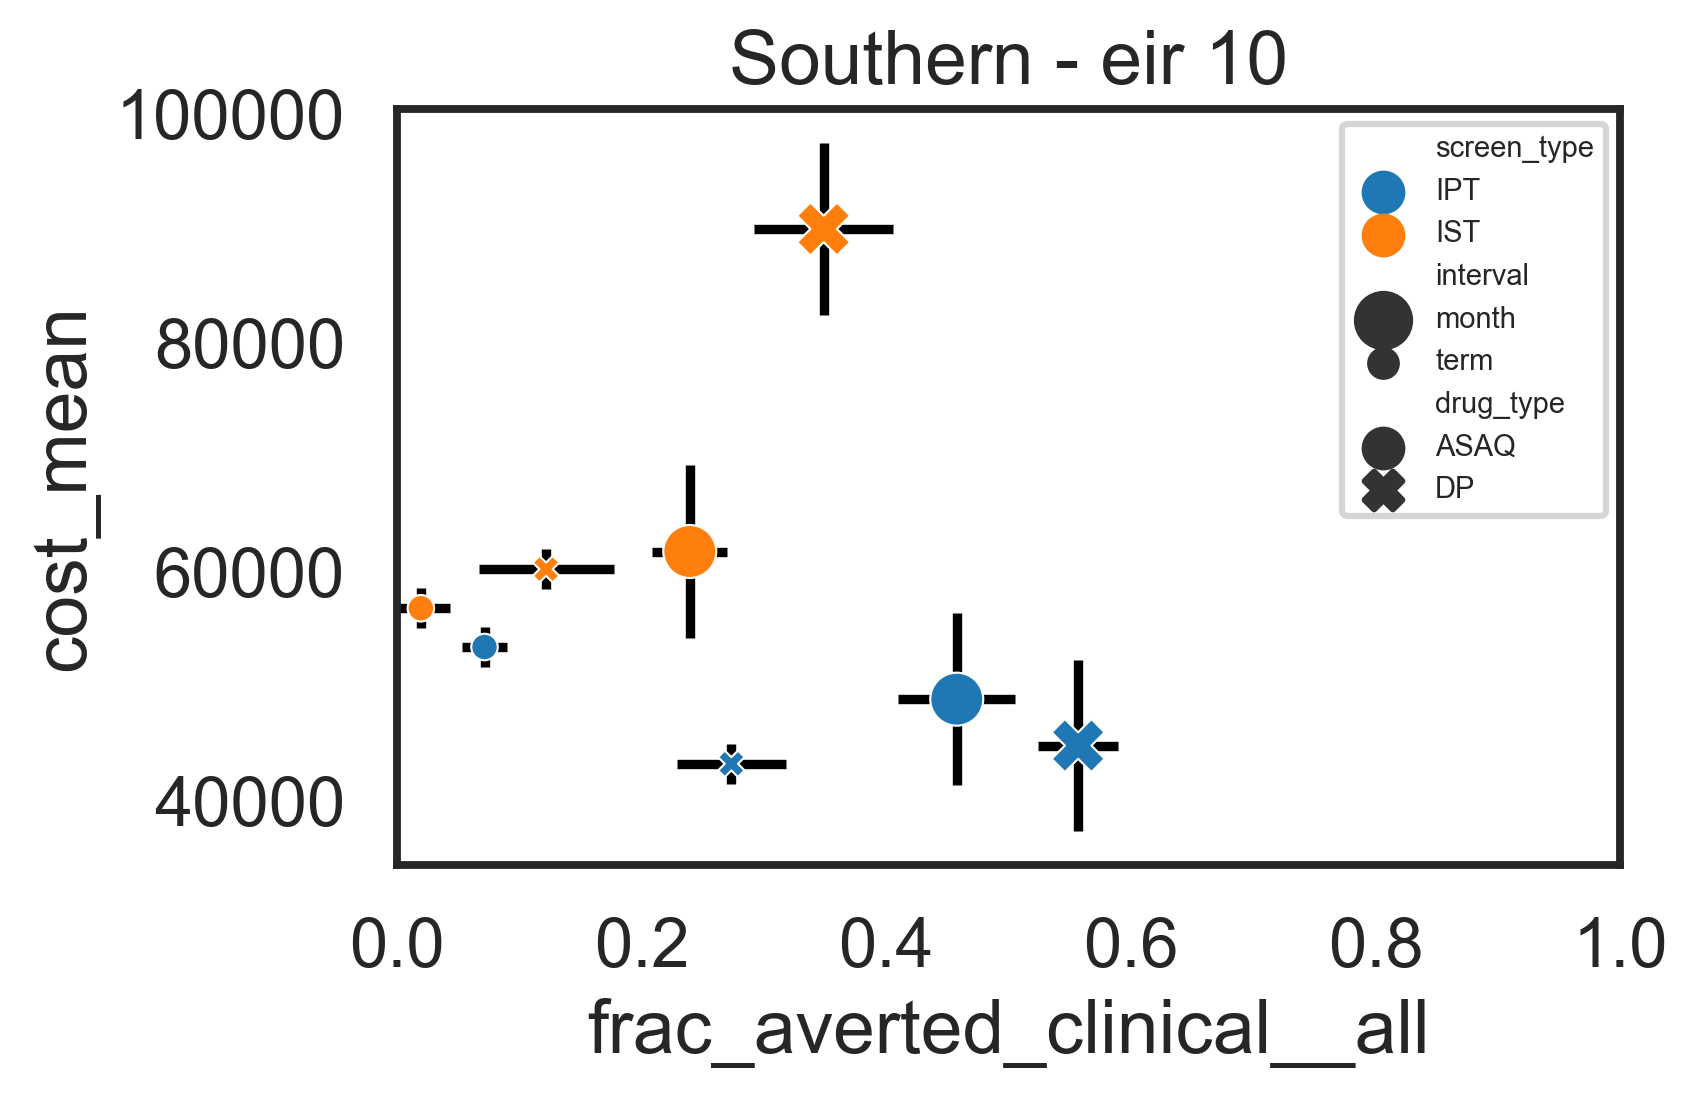

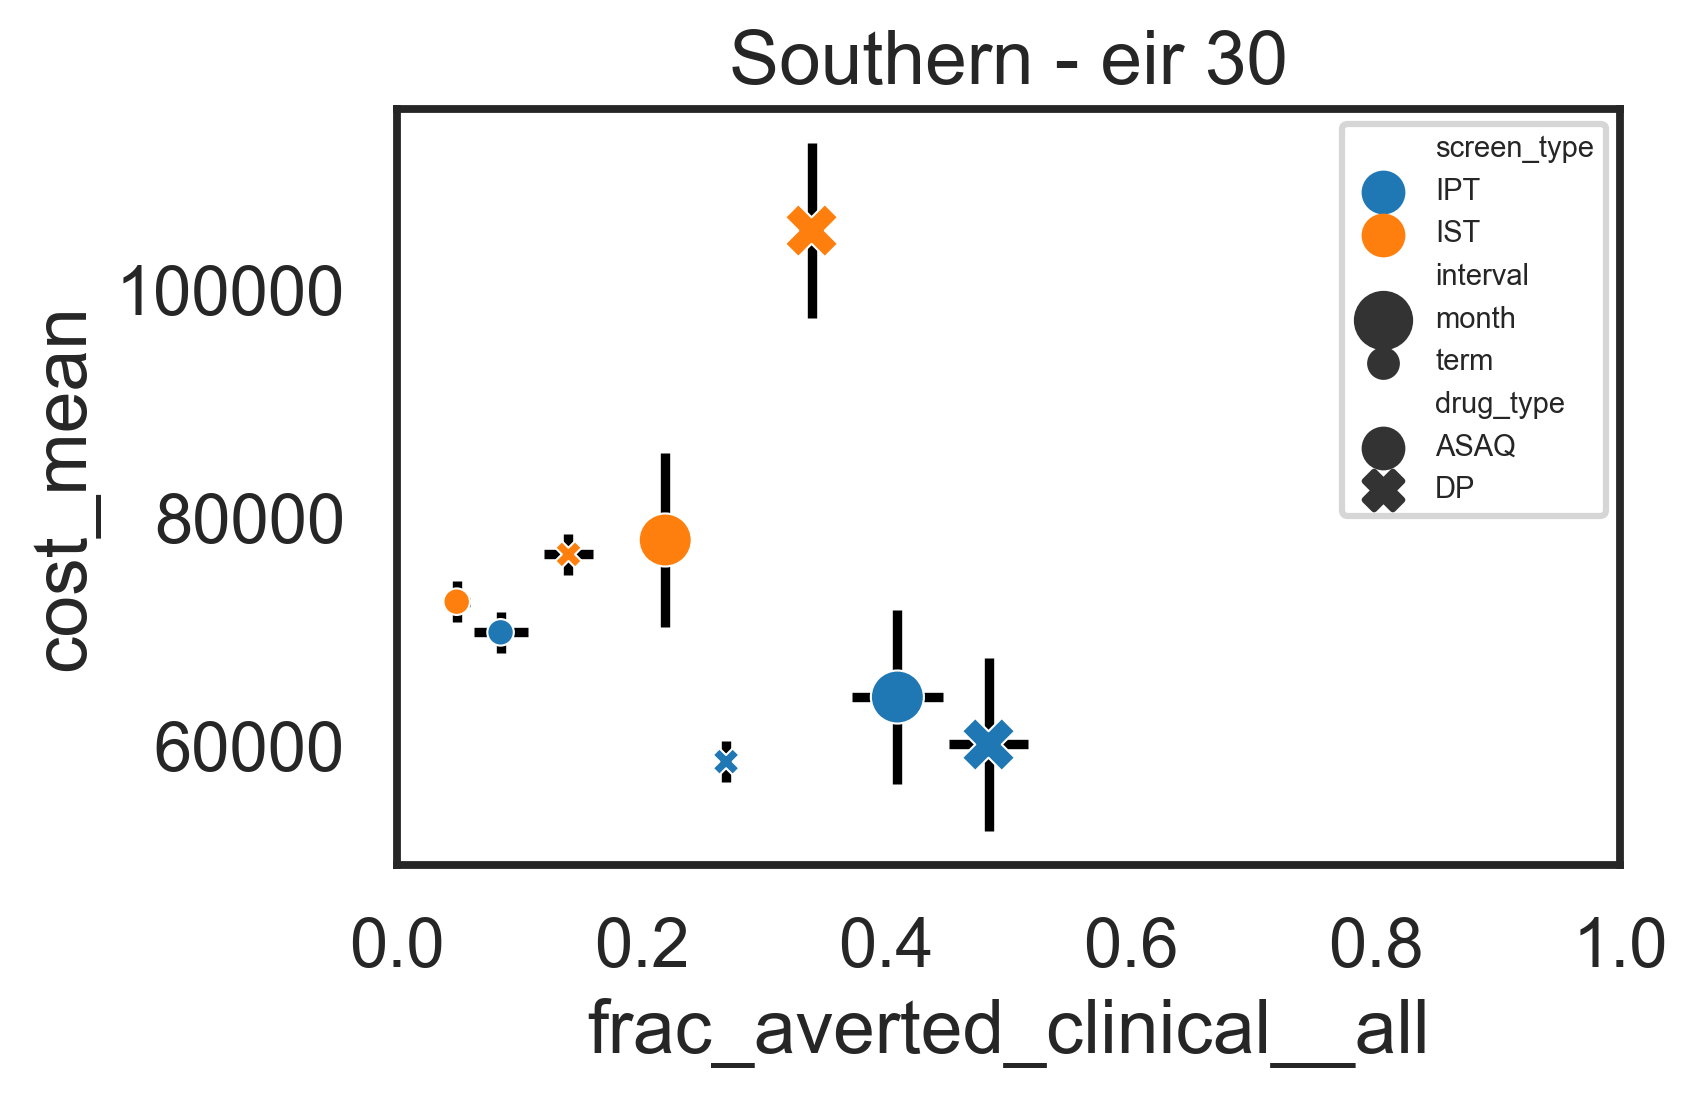

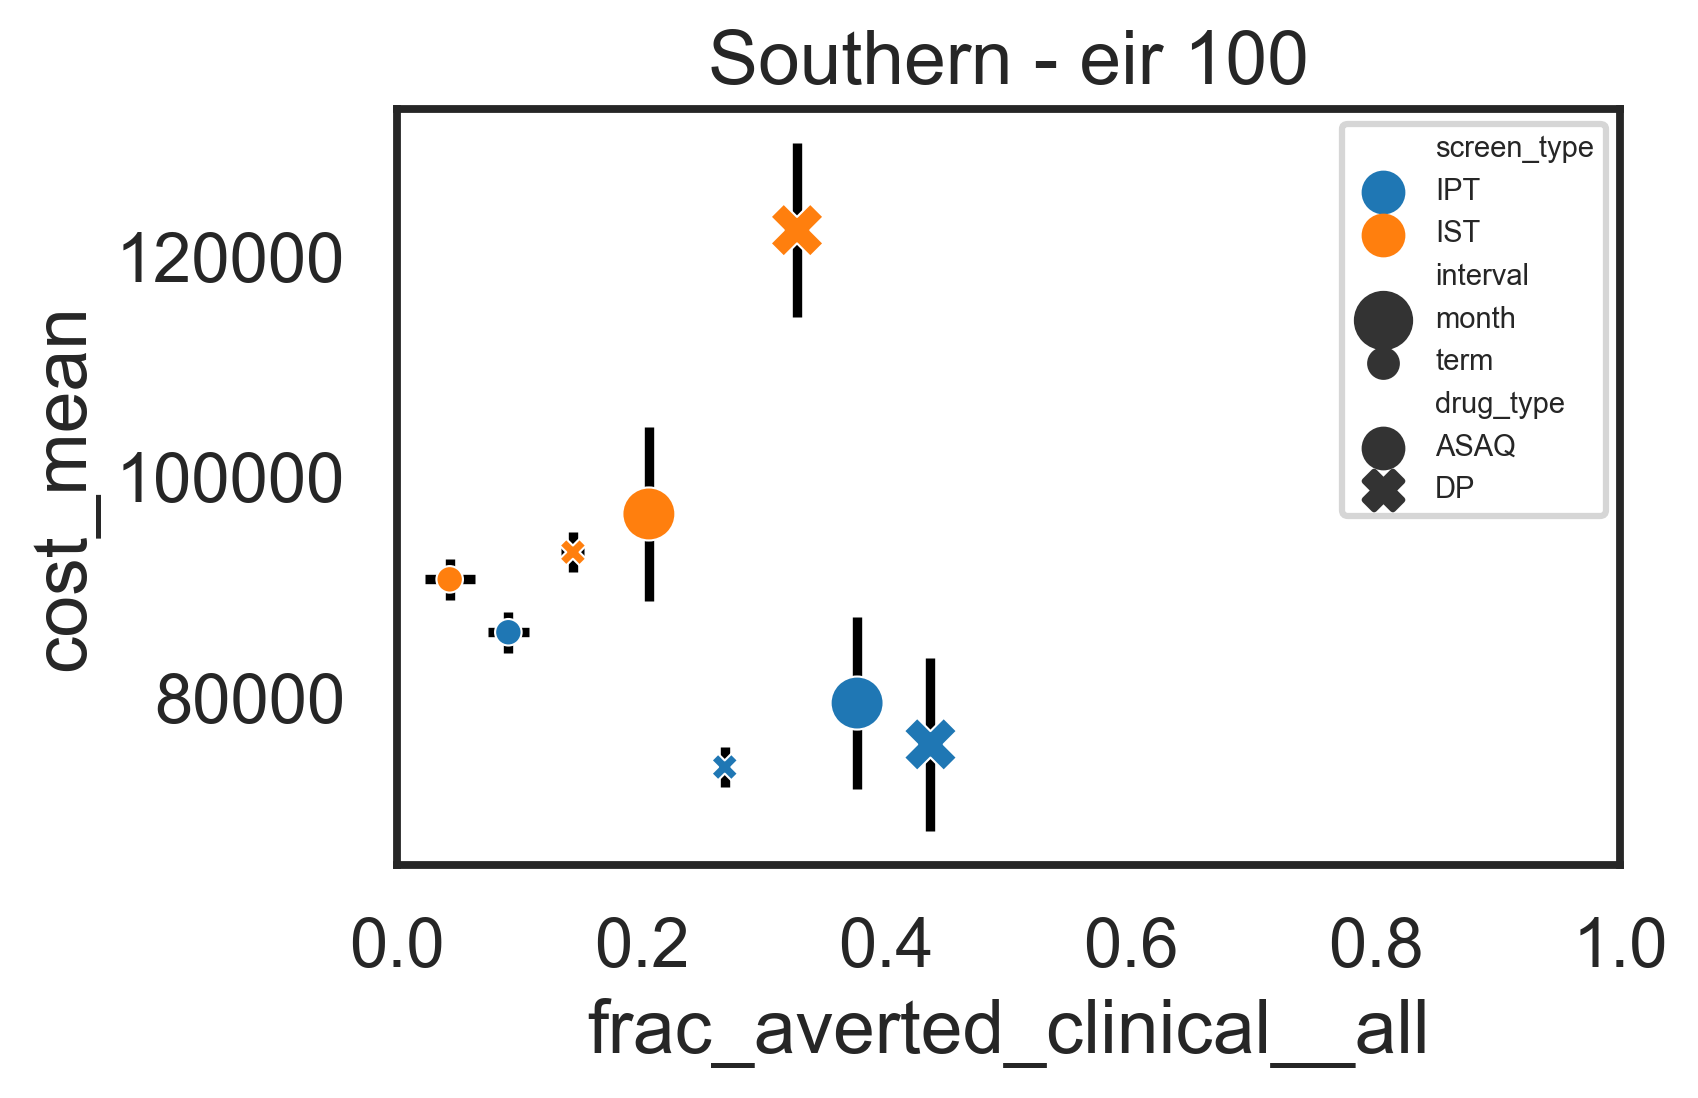

In [79]:
for a, sdf in df_scatterplot.groupby(["archetype", "baseline_eir"]):
    plt.figure(dpi=300)
    sdf_without_no_iptsc = sdf[np.logical_not(sdf["scenario_number"]==30)]
    sns.scatterplot(data=sdf_without_no_iptsc, x="frac_averted_clinical__all", y="cost_mean", style="drug_type", hue="screen_type", size="interval",size_order=["month","term"], zorder=2)
    
    
    yerr = np.zeros([2,len(sdf_without_no_iptsc)])
    yerr[0:] = sdf_without_no_iptsc["cost_mean"]-sdf_without_no_iptsc["cost_low_IPTsc_only"]
    yerr[1:] = sdf_without_no_iptsc["cost_high_IPTsc_only"]-sdf_without_no_iptsc["cost_mean"]
    
    plt.errorbar(sdf_without_no_iptsc["frac_averted_clinical__all"], 
                 sdf_without_no_iptsc["cost_mean"], 
                 xerr=sdf_without_no_iptsc["frac_averted_clinical__all_STDEV"],
                 yerr=yerr,
                linestyle="none",
                color="black", zorder=1)
    
    # plt.scatter(sdf["frac_averted_clinical__all"], sdf["cost"]
    
#     no_iptsc = sdf[sdf["scenario_number"]==30]
#     plt.axhline(no_iptsc["cost_per1kpop_peryear"].iloc[0], color='black', linestyle='dotted')
    
    plt.title(f"{a[0]} - eir {a[1]}") 
    plt.legend(fontsize=7)
    # plt.ylim([0,15000])
    plt.xlim([0,1])
    
    plt.tight_layout()
    plt.savefig(f"figs/{a[0]}_{str(a[1]).zfill(3)}.png")
    plt.savefig(f"figs/{a[0]}_{str(a[1]).zfill(3)}.pdf")

# SMC

In [63]:
# scenarios_to_plot = [13,30,35,36]
scenarios_to_plot = [13,35,36]
df_smcplot = df[np.logical_and(df["archetype"]=="Sahel",
                               np.in1d(df["scenario_number"], scenarios_to_plot))]
# label_dict = {30: "u5 SMC",
label_dict = {13: "u5 SMC + IPTsc",
              35: "u10 SMC",
              36: "u15 SMC"}

# color_dict = {30: "C0",
color_dict = {13: "C1",
              35: "C2",
              36: "C3"}

# c = ["C0", "C1", "C2", "C3"]


In [64]:
df_smcplot["label"] = df_smcplot["scenario_number"].apply(lambda x: label_dict[x])

C:\Users\joshsu\AppData\Local\Temp/ipykernel_19800/2524793268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smcplot["label"] = df_smcplot["scenario_number"].apply(lambda x: label_dict[x])


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


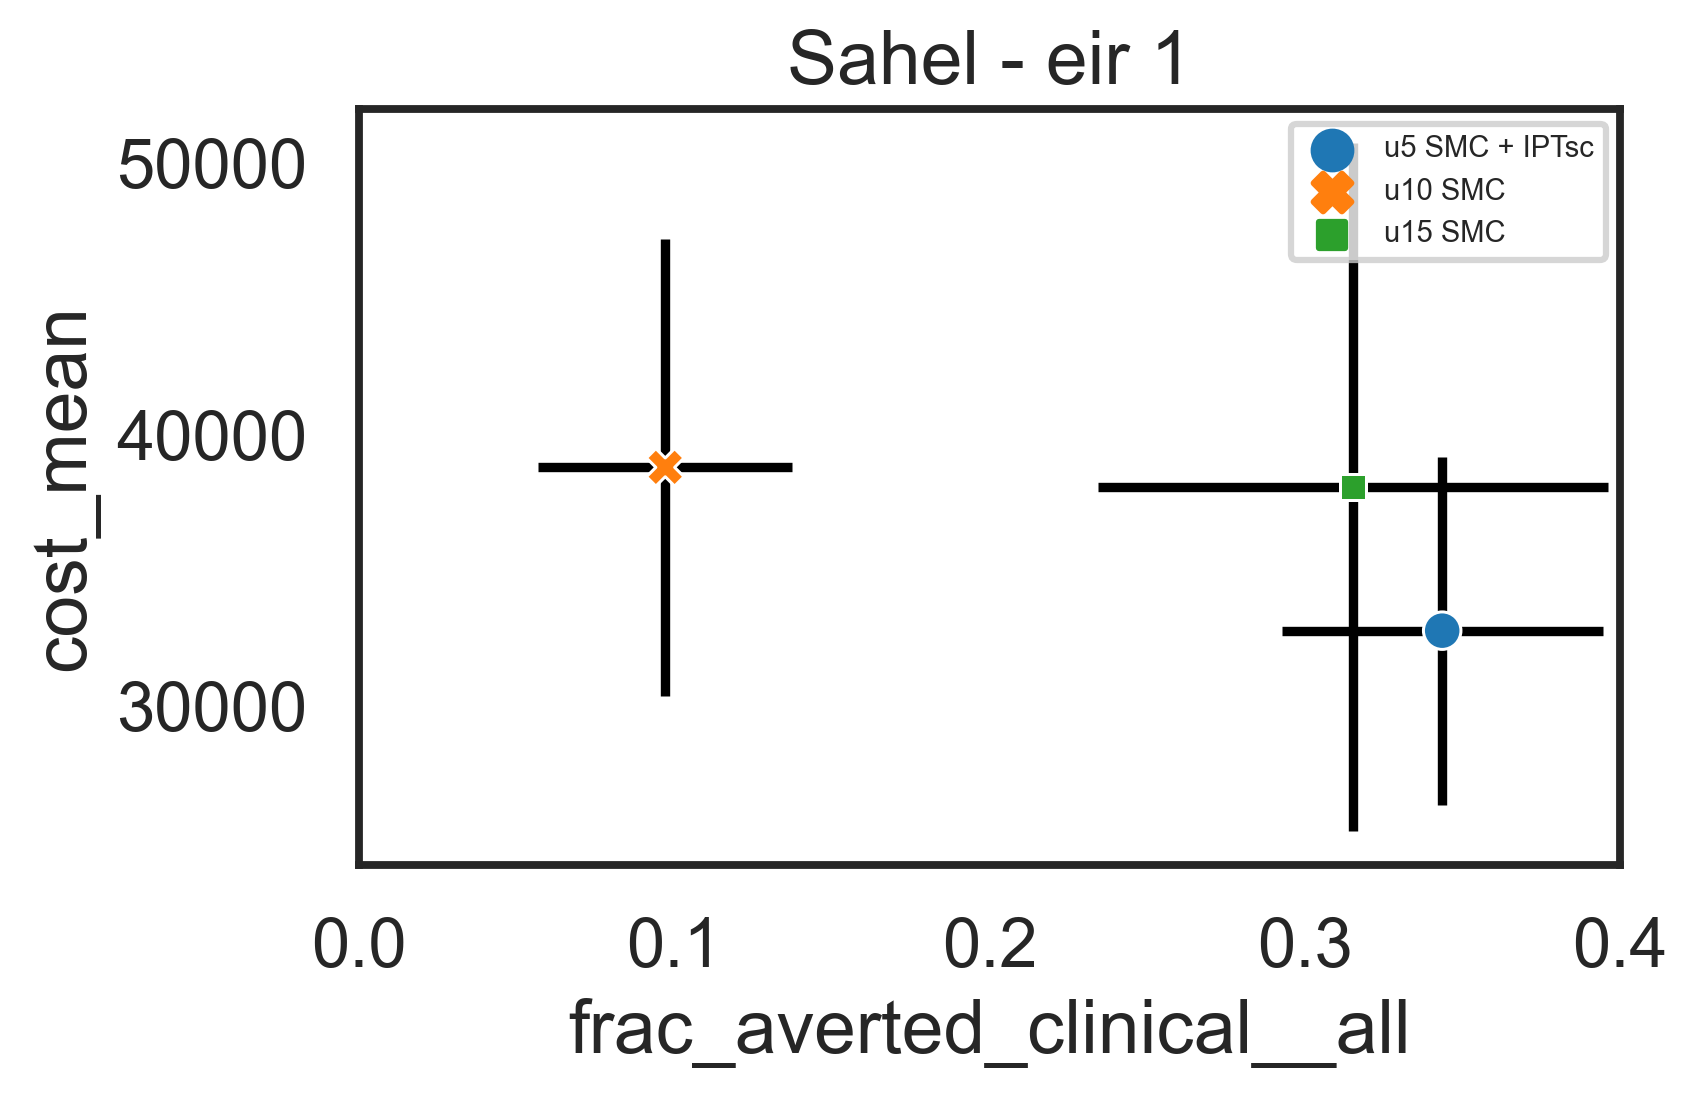

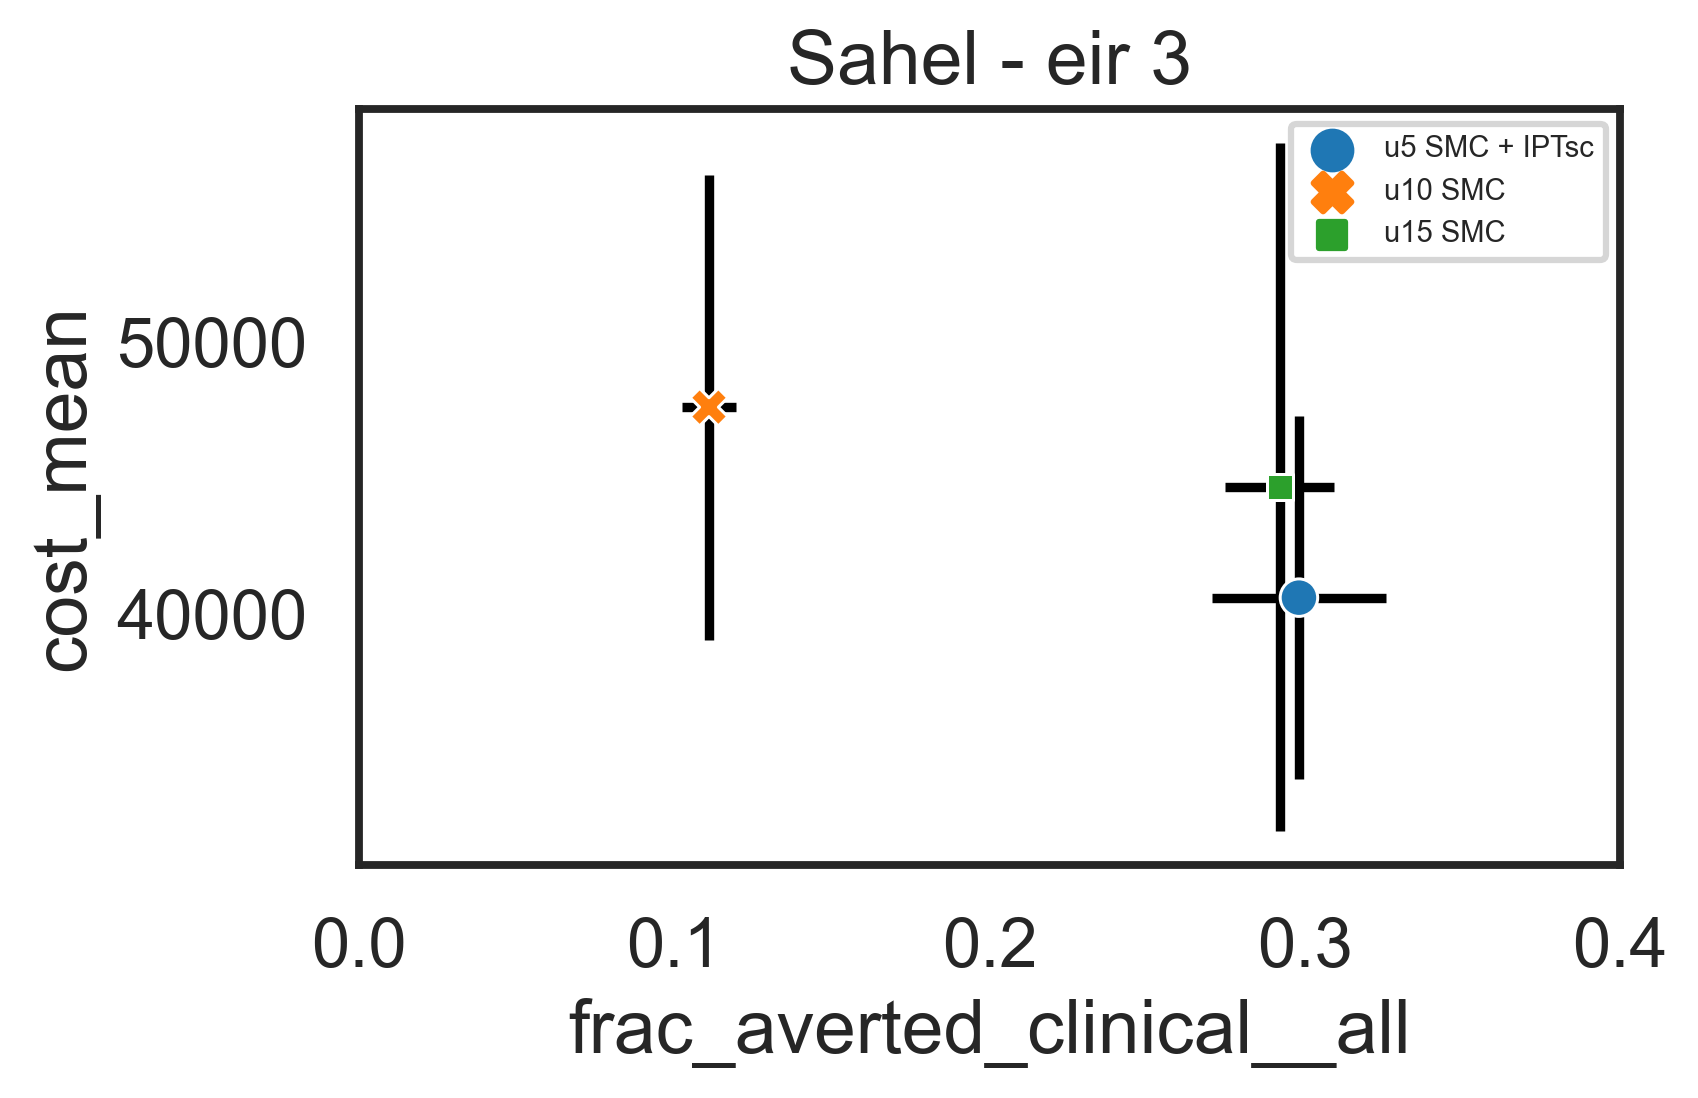

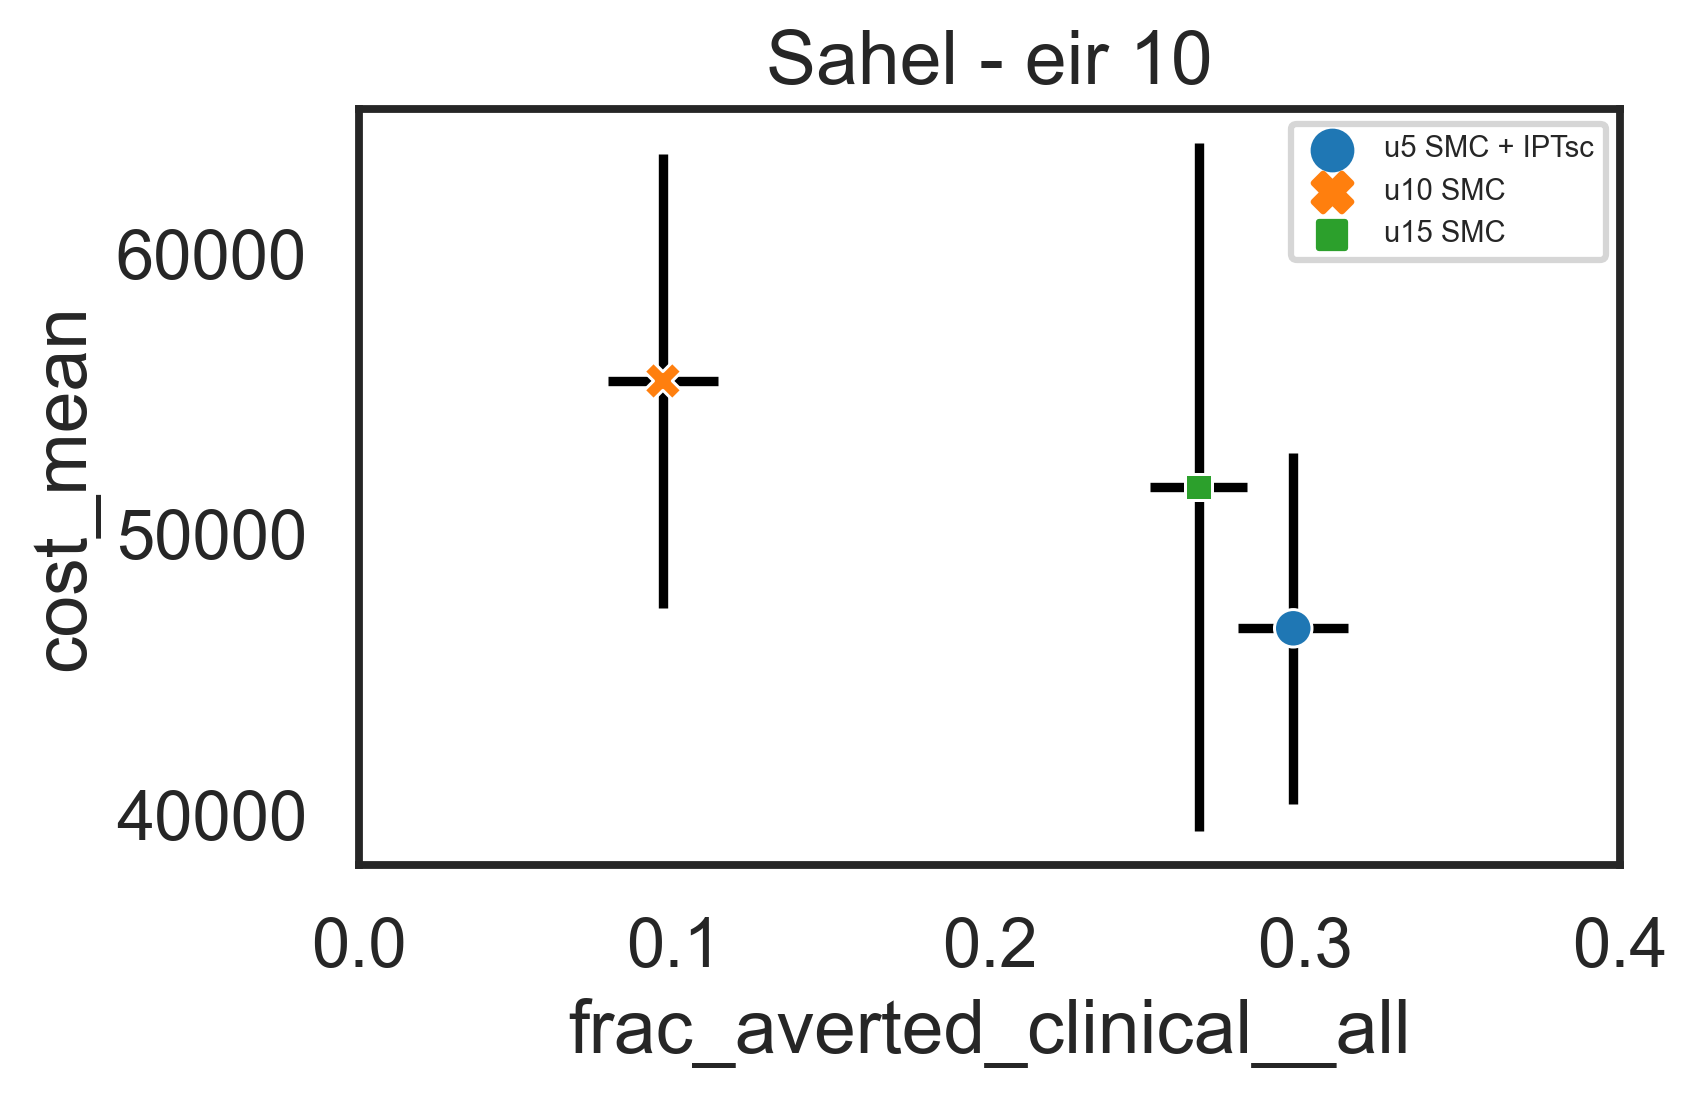

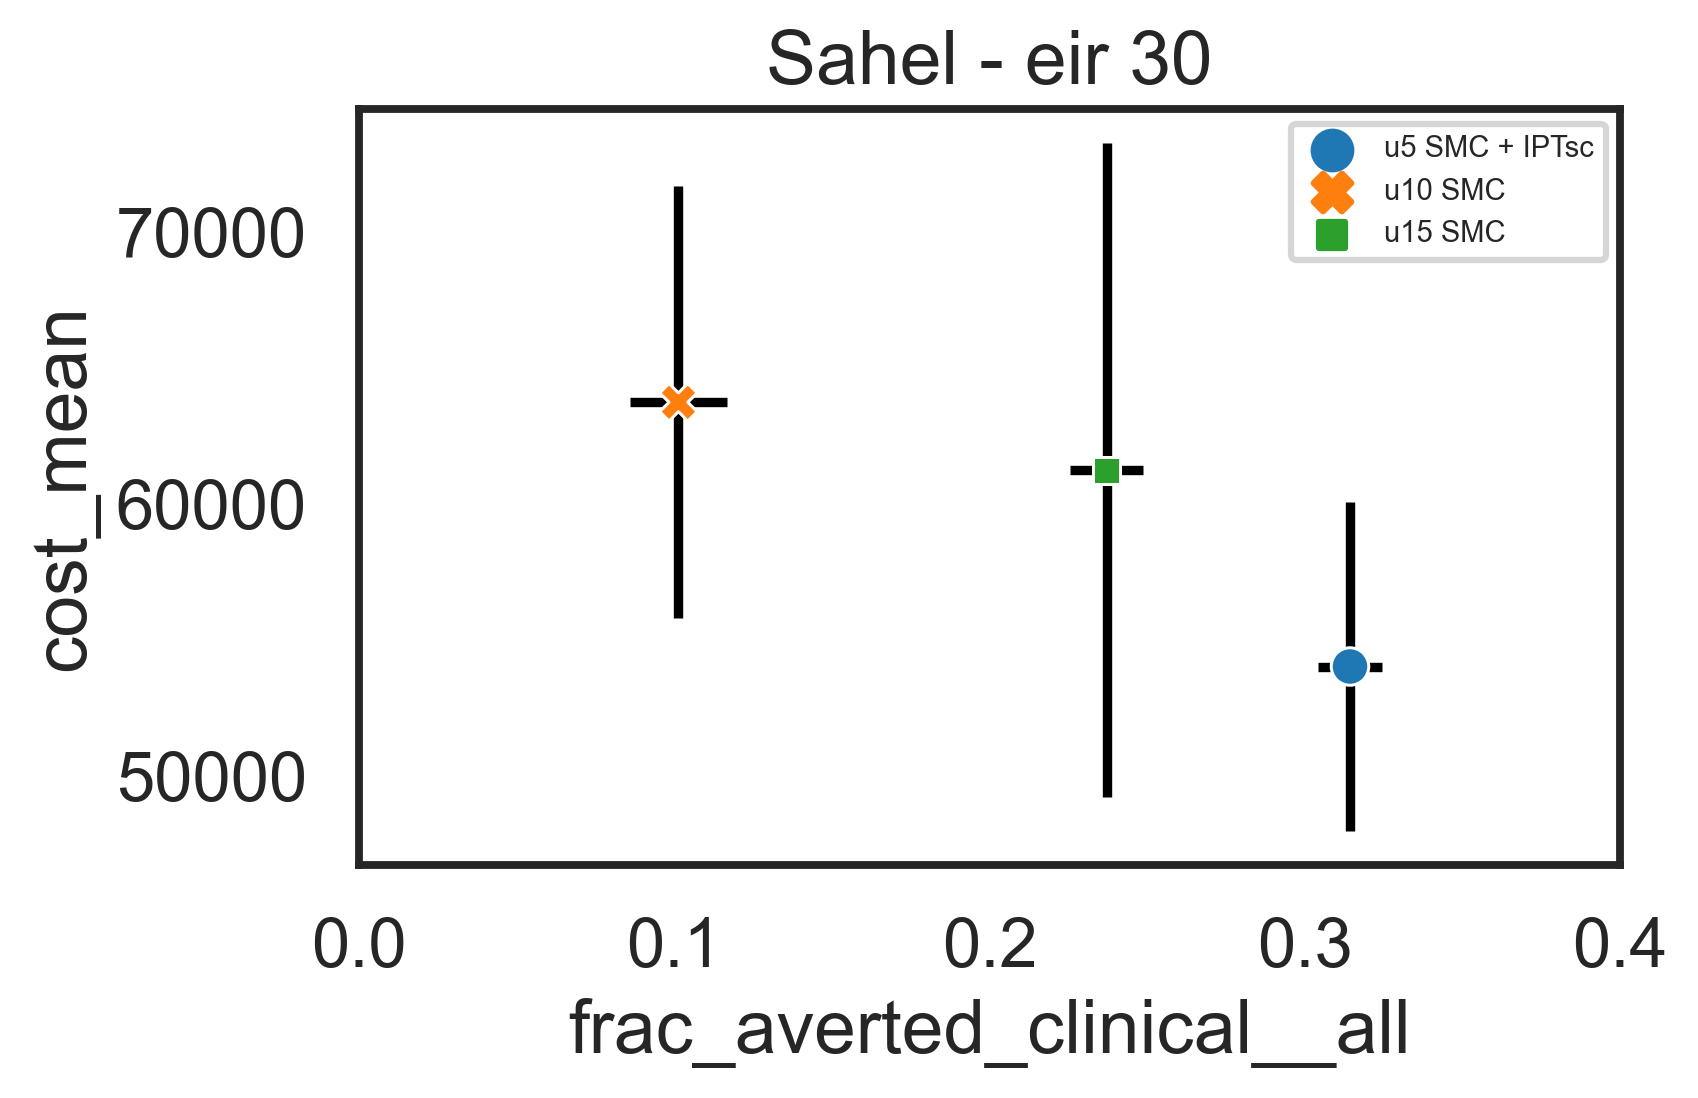

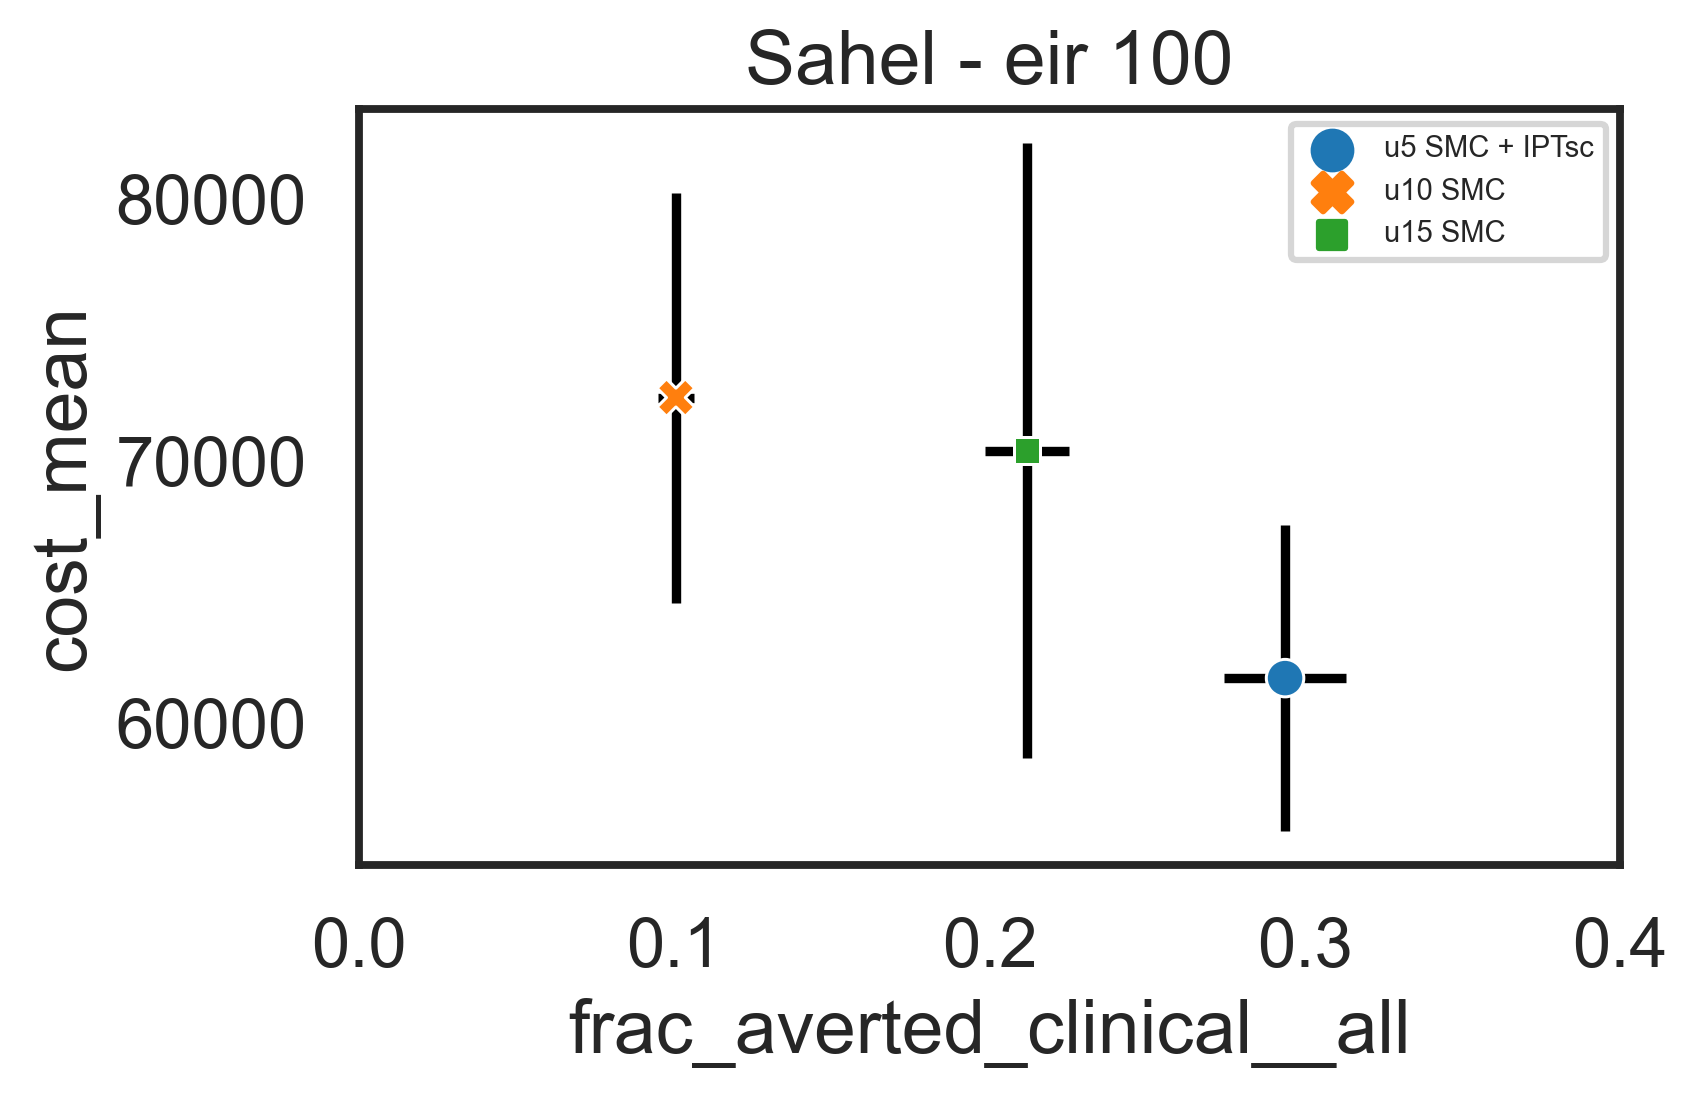

In [80]:
for a,sdf in df_smcplot.groupby("baseline_eir"):
    plt.figure(dpi=300)
    sns.scatterplot(data=sdf, x="frac_averted_clinical__all", y="cost_mean", hue="label", zorder=2, style="label")
    
    yerr = np.zeros([2,len(sdf)])
    yerr[0:] = sdf["cost_mean"]-sdf["cost_low"]
    yerr[1:] = sdf["cost_high"]-sdf["cost_mean"]
    plt.errorbar(sdf["frac_averted_clinical__all"], sdf["cost_mean"], 
                 xerr=sdf["frac_averted_clinical__all_STDEV"], yerr=yerr,
                linestyle='none', color='black', zorder=1)
    plt.xlim([0,0.4])
    
    plt.legend(fontsize=7)
    plt.title(f"Sahel - eir {a}")
    
    plt.tight_layout()
    plt.savefig(f"figs/Sahel_{str(a).zfill(3)}_SMC.png")
    plt.savefig(f"figs/Sahel_{str(a).zfill(3)}_SMC.pdf")
    # plt.close('all')
        # plt.legend()